# Counterfeit Banknotes Detection

Banknotes are one of the most important assets of a country. Some criminals introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. Fake notes are created with precision, hence there is need for an efficient algorithm which accurately predicts whether a banknote is genuine or not.

Two datasets of genuine and not genuine banknotes will be examined:
1. *Banknote Authentication Data* from UCI [1];
2. *Swiss Banknote Data* from R documentation [2].

These datasets have different features and the goal of my analysis is to classify genuine (label 0) and counterfeit (label 1) banknotes comparing different features through Machine Learning algorithms.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree
import graphviz

In [2]:
### PARAMETERS ###
PATH_UCI_DATASET = "banknote_data.csv"
PATH_SWISS_DATASET = "swiss_banknote.txt"

### 1 - Data Exploration

Before start training the selected Machine Learning algorithms on the Banknote datasets, it is helpful to describe our data and discover any patterns that could help in customizing Machine Learning algorithms to fit our data correctly.

The *UCI Dataset* contains data extracted from images that were taken from genuine and forged banknote-like specimens; Wavelet Transform tools were used to extract features from images. Here, the features are:
1. variance of Wavelet Transformed image (continuous): variance finds out how each pixel varies from the neighboring pixels and classifies them into different regions;
2. skewness of Wavelet Transformed image (continuous): skewness is the measure of the lack of symmetry;
3. kurtosis of Wavelet Transformed image (continuous): kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution;
4. entropy of image (continuous): image entropy is a quantity which is used to describe the amount of information which must be coded for, by a compression algorithm;
5. class (integer).  

The number of records is 1372.

In [3]:
### Read dataset ###
uciData = pd.read_csv(PATH_UCI_DATASET, header = 0, sep = ",")
uciData.info()
print()
print(uciData.head())
uciData["counterfeit"].replace(to_replace = 1, value = 0, inplace = True)
uciData["counterfeit"].replace(to_replace = 2, value = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wavelet_transformed_variance  1372 non-null   float64
 1   wavelet_transformed_skewness  1372 non-null   float64
 2   wavelet_transformed_curtosis  1372 non-null   float64
 3   image_entropy                 1372 non-null   float64
 4   counterfeit                   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB

   wavelet_transformed_variance  wavelet_transformed_skewness  \
0                       3.62160                        8.6661   
1                       4.54590                        8.1674   
2                       3.86600                       -2.6383   
3                       3.45660                        9.5228   
4                       0.32924                       -4.4552   

   wavelet_transformed_curtosis  image

The *Swiss Dataset* contains measurements on 200 Swiss banknotes: 100 genuine and 100 counterfeit. The variables are length of bill, width of left edge, width of right edge, bottom margin width and top margin width. All measurements are in millimetres.

In [4]:
swissData = pd.read_csv(PATH_SWISS_DATASET, header = 0, sep = " ")
swissData.info()
print()
print(swissData.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Status    200 non-null    object 
 1   Length    200 non-null    float64
 2   Left      200 non-null    float64
 3   Right     200 non-null    float64
 4   Bottom    200 non-null    float64
 5   Top       200 non-null    float64
 6   Diagonal  200 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.1+ KB

    Status  Length   Left  Right  Bottom   Top  Diagonal
0  genuine   214.8  131.0  131.1     9.0   9.7     141.0
1  genuine   214.6  129.7  129.7     8.1   9.5     141.7
2  genuine   214.8  129.7  129.7     8.7   9.6     142.2
3  genuine   214.8  129.7  129.6     7.5  10.4     142.0
4  genuine   215.0  129.6  129.7    10.4   7.7     141.8


Both dataset don't have NaN values for every variable.

In [5]:
uciDataX = uciData.drop(columns = "counterfeit")
uciDataY = uciData["counterfeit"]
swissDataX = swissData.drop(columns = "Status")
swissDataY = swissData["Status"]
swissDataY = swissDataY.replace(to_replace = "genuine", value = 0)
swissDataY = swissDataY.replace(to_replace = "counterfeit", value = 1)
labels = ["Genuine", "Counterfeit"]

Numbers of records 'Genuine' in UCI Dataset:  762
Numbers of records 'Counterfeit' in UCI Dataset:  610
Numbers of records 'Genuine' in Swiss Dataset:  100
Numbers of records 'Counterfeit' in Swiss Dataset:  100


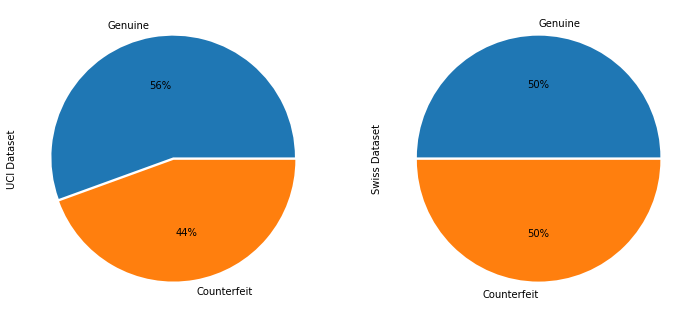

In [6]:
uciDataNumGenuine = len(uciData[uciData["counterfeit"] == 0])
uciDataNumCounterfeit = len(uciData[uciData["counterfeit"] == 1])
print("Numbers of records 'Genuine' in UCI Dataset: ", uciDataNumGenuine)
print("Numbers of records 'Counterfeit' in UCI Dataset: ", uciDataNumCounterfeit)
swissDataNumGenuine = len(swissData[swissData["Status"] == "genuine"])
swissDataNumCounterfeit = len(swissData[swissData["Status"] == "counterfeit"])
print("Numbers of records 'Genuine' in Swiss Dataset: ", swissDataNumGenuine)
print("Numbers of records 'Counterfeit' in Swiss Dataset: ", swissDataNumCounterfeit)
fig, ax = plt.subplots(1, 2, figsize = (12,8))
uciDataY.value_counts().plot.pie(ax = ax[0], explode = [.01, .01], autopct = '%1.0f%%', labels = labels)
ax[0].set_ylabel("UCI Dataset")
swissDataY.value_counts().plot.pie(ax = ax[1], explode = [.01, .01], autopct = '%1.0f%%', labels = labels)
ax[1].set_ylabel("Swiss Dataset")
plt.show()
plt.close()

Data of the *Swiss Dataset* is 50% genuine and 50% counterfeit. Instead, data of the *UCI Dataset* is 56% genuine and 44% counterfeit about; hence, it is almost balanced. 

#### 1.1 - Absolute Frequencies

The absolute frequencies of both datasets are computed and plotted:
- *UCI Dataset* contains almost all different values for every variable; this is probably due to the object of measurement because it is very different and has more precision in its digital representation;
- *Swiss Dataset* contains some equal values for every variable.

In [7]:
uciDataVarianceCounts = uciData["wavelet_transformed_variance"].value_counts()
print("Wavelet Transformed Variance more common: ", uciDataVarianceCounts.iloc[0])
print("Wavelet Transformed Variance less common: ", uciDataVarianceCounts.iloc[-1])
print("Number of different values of Wavelet Transformed Variance: ", uciDataVarianceCounts.size)
print(uciDataVarianceCounts)
'''
uciDataVarianceCounts.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Wavelet Transformed Variance")
plt.xlabel("frequencies")
plt.ylabel("values")
plt.show()
plt.close()
'''
uciDataSkewnessCounts = uciData["wavelet_transformed_skewness"].value_counts()
print("Wavelet Transformed Skewness more common: ", uciDataSkewnessCounts.iloc[0])
print("Wavelet Transformed Skewness less common: ", uciDataSkewnessCounts.iloc[-1])
print("Number of different values of Wavelet Transformed Skewness: ", uciDataSkewnessCounts.size)
print(uciDataSkewnessCounts)
'''
uciDataSkewnessCounts.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Wavelet Transformed Skewness")
plt.xlabel("frequencies")
plt.ylabel("values")
plt.show()
plt.close()
'''
uciDataCurtosisCounts = uciData["wavelet_transformed_curtosis"].value_counts()
print("Wavelet Transformed Curtosis more common: ", uciDataCurtosisCounts.iloc[0])
print("Wavelet Transformed Curtosis less common: ", uciDataCurtosisCounts.iloc[-1])
print("Number of different values of Wavelet Transformed Curtosis: ", uciDataCurtosisCounts.size)
print(uciDataCurtosisCounts)
'''
uciDataCurtosisCounts.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Wavelet Transformed Curtosis")
plt.xlabel("frequencies")
plt.ylabel("values")
plt.show()
plt.close()
'''
uciDataEntropyCounts = uciData["image_entropy"].value_counts()
print("Wavelet Transformed Image Entropy more common: ", uciDataEntropyCounts.iloc[0])
print("Wavelet Transformed Image Entropy common: ", uciDataEntropyCounts.iloc[-1])
print("Number of different values of Image Entropy: ", uciDataEntropyCounts.size)
print(uciDataEntropyCounts)
'''
uciDataEntropyCounts.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Image Entropy")
plt.xlabel("frequencies")
plt.ylabel("values")
plt.show()
plt.close
'''

Wavelet Transformed Variance more common:  5
Wavelet Transformed Variance less common:  1
Number of different values of Wavelet Transformed Variance:  1338
 0.57060    5
 0.32920    4
 0.37980    4
 0.51950    4
-2.64790    3
           ..
-0.94255    1
-0.41645    1
 4.46820    1
 3.26970    1
-3.31250    1
Name: wavelet_transformed_variance, Length: 1338, dtype: int64
Wavelet Transformed Skewness more common:  6
Wavelet Transformed Skewness less common:  1
Number of different values of Wavelet Transformed Skewness:  1256
-4.45520    6
-3.26330    5
-3.79710    4
-0.02480    4
 0.70980    4
           ..
-7.83220    1
 2.90730    1
 3.32530    1
 2.14380    1
 0.80287    1
Name: wavelet_transformed_skewness, Length: 1256, dtype: int64
Wavelet Transformed Curtosis more common:  5
Wavelet Transformed Curtosis less common:  1
Number of different values of Wavelet Transformed Curtosis:  1270
 3.0895    5
 4.5718    5
 1.2421    5
 0.7572    4
-3.7044    3
          ..
-2.9033    1
-4.8003

'\nuciDataEntropyCounts.sort_index().plot.barh(figsize = (12, 250))\nplt.title("UCI Dataset: Image Entropy")\nplt.xlabel("frequencies")\nplt.ylabel("values")\nplt.show()\nplt.close\n'

The plot of these data is not made because of the very big number of different values.

Length more common:  25
Length less common:  1
Number of different values of Length:  21
214.8    25
215.1    21
214.9    21
215.0    20
214.6    18
214.5    16
214.7    16
215.2    14
215.3    10
214.4     6
215.4     6
214.3     5
215.6     5
215.5     5
214.2     3
215.7     3
213.9     2
215.9     1
214.1     1
216.3     1
213.8     1
Name: Length, dtype: int64


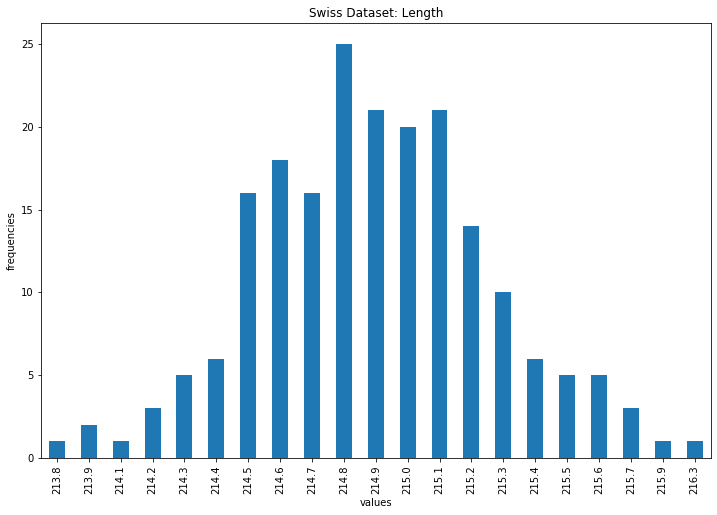

Left more common:  22
Left less common:  1
Number of different values of Left:  17
130.4    22
129.9    21
130.2    21
130.3    18
129.7    17
130.5    17
130.1    15
130.0    15
129.6    12
130.6    11
129.8     9
130.7     8
129.5     5
129.4     4
130.8     3
129.0     1
131.0     1
Name: Left, dtype: int64


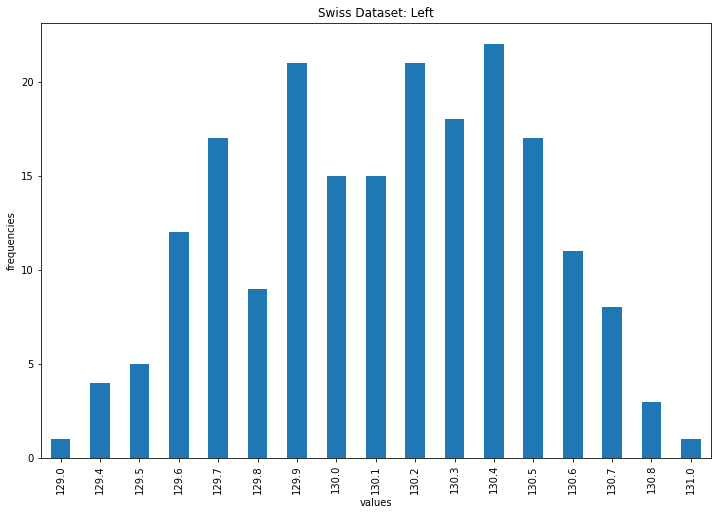

Right more common:  22
Right less common:  1
Number of different values of Right:  19
130.0    22
130.1    19
129.7    19
130.3    19
130.2    18
130.4    16
129.9    14
129.4    13
129.8    12
129.6    11
129.3     8
129.5     7
130.6     6
129.2     4
130.5     4
131.1     3
130.8     2
129.1     2
129.0     1
Name: Right, dtype: int64


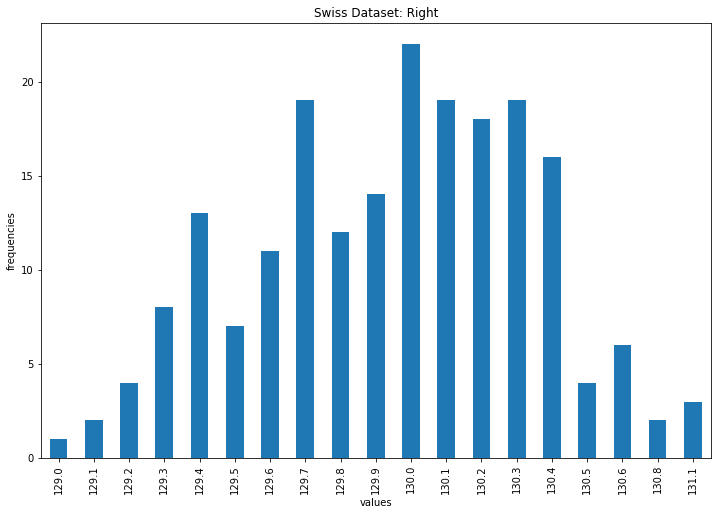

Bottom more common:  11
Bottom less common:  1
Number of different values of Bottom:  50
7.9     11
8.0      9
11.4     8
8.2      8
9.0      7
7.4      7
10.6     6
8.7      6
10.2     6
8.6      6
9.9      6
8.4      6
7.7      5
11.0     5
8.8      5
11.6     5
8.3      5
9.3      5
11.9     5
8.9      4
9.6      4
8.1      4
10.7     4
11.8     4
10.4     4
10.1     4
7.5      4
10.3     3
10.0     3
7.2      3
9.2      3
7.8      3
9.8      3
9.1      3
9.4      2
8.5      2
10.5     2
11.5     2
7.6      2
12.3     2
11.3     2
9.7      2
11.2     2
12.1     2
12.0     1
12.5     1
9.5      1
10.8     1
7.3      1
12.7     1
Name: Bottom, dtype: int64


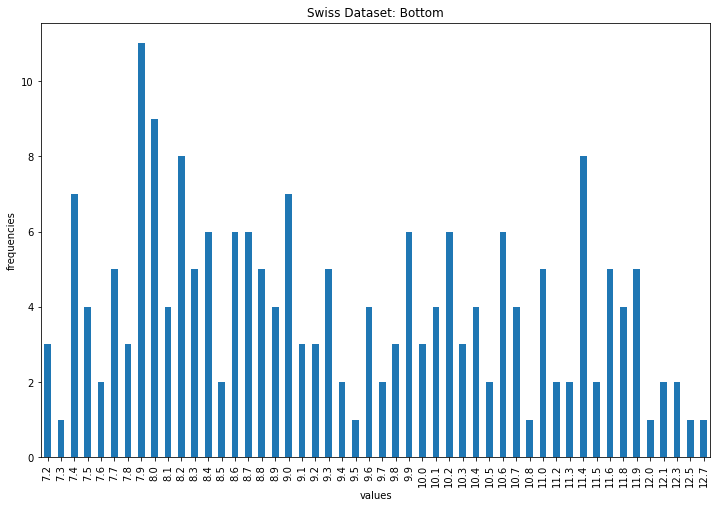

Top more common:  14
Top less common:  1
Number of different values of Top:  35
10.0    14
10.5    14
10.2    11
10.3    11
10.6    11
10.7    11
11.0    10
11.5    10
11.2    10
10.9     9
11.1     8
10.8     8
9.7      7
12.1     6
11.4     5
12.0     5
9.8      5
9.5      5
11.8     4
9.0      4
10.4     3
10.1     3
11.7     3
11.9     3
9.6      3
9.9      3
11.3     2
12.2     2
9.1      2
11.6     2
9.4      2
12.3     1
8.5      1
7.7      1
9.3      1
Name: Top, dtype: int64


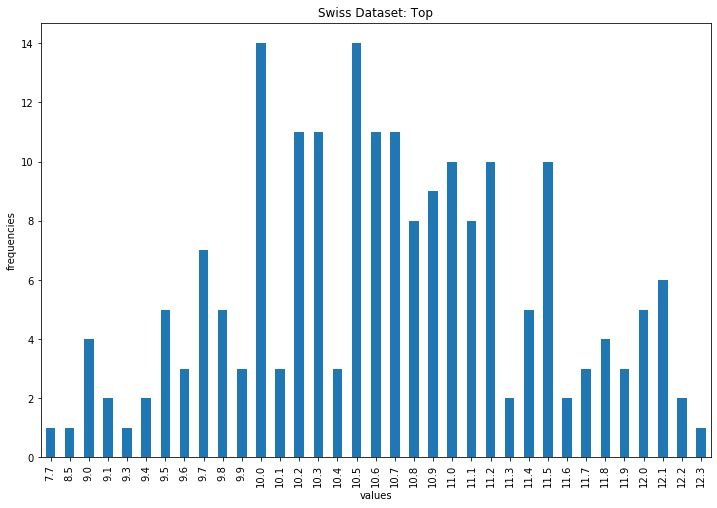

Diagonal more common:  12
Diagonal less common:  1
Number of different values of Top:  42
141.5    12
139.6    11
141.8    11
139.2    10
139.4    10
139.7     9
139.9     9
141.4     9
141.6     8
139.8     8
142.0     8
141.7     7
139.5     7
139.3     6
141.2     6
141.9     5
141.1     5
140.9     5
141.3     5
141.0     5
140.2     4
140.0     3
142.3     3
140.3     3
142.1     3
139.1     3
139.0     2
140.7     2
142.2     2
140.6     2
140.1     2
137.8     2
138.6     2
138.5     2
138.1     2
138.7     1
138.8     1
138.4     1
142.4     1
138.3     1
140.8     1
137.9     1
Name: Diagonal, dtype: int64


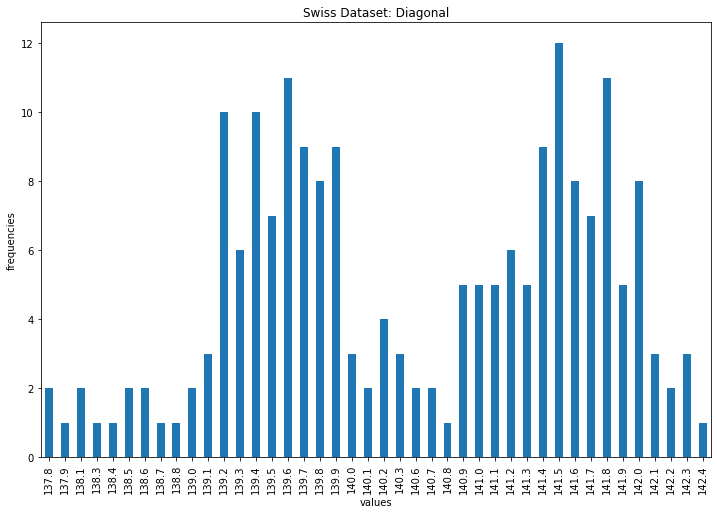

In [8]:
swissDataLengthCounts = swissData["Length"].value_counts()
print("Length more common: ", swissDataLengthCounts.iloc[0])
print("Length less common: ", swissDataLengthCounts.iloc[-1])
print("Number of different values of Length: ", swissDataLengthCounts.size)
print(swissDataLengthCounts)
swissDataLengthCounts.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Length")
plt.xlabel("values")
plt.ylabel("frequencies")
plt.show()
plt.close
swissDataLeftCounts = swissData["Left"].value_counts()
print("Left more common: ", swissDataLeftCounts.iloc[0])
print("Left less common: ", swissDataLeftCounts.iloc[-1])
print("Number of different values of Left: ", swissDataLeftCounts.size)
print(swissDataLeftCounts)
swissDataLeftCounts.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Left")
plt.xlabel("values")
plt.ylabel("frequencies")
plt.show()
plt.close()
swissDataRightCounts = swissData["Right"].value_counts()
print("Right more common: ", swissDataRightCounts.iloc[0])
print("Right less common: ", swissDataRightCounts.iloc[-1])
print("Number of different values of Right: ", swissDataRightCounts.size)
print(swissDataRightCounts)
swissDataRightCounts.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Right")
plt.xlabel("values")
plt.ylabel("frequencies")
plt.show()
plt.close()
swissDataBottomCounts = swissData["Bottom"].value_counts()
print("Bottom more common: ", swissDataBottomCounts.iloc[0])
print("Bottom less common: ", swissDataBottomCounts.iloc[-1])
print("Number of different values of Bottom: ", swissDataBottomCounts.size)
print(swissDataBottomCounts)
swissDataBottomCounts.sort_index().plot.bar(figsize  = (12, 8))
plt.title("Swiss Dataset: Bottom")
plt.xlabel("values")
plt.ylabel("frequencies")
plt.show()
plt.close()
swissDataTopCounts = swissData["Top"].value_counts()
print("Top more common: ", swissDataTopCounts.iloc[0])
print("Top less common: ", swissDataTopCounts.iloc[-1])
print("Number of different values of Top: ", swissDataTopCounts.size)
print(swissDataTopCounts)
swissDataTopCounts.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Top")
plt.xlabel("values")
plt.ylabel("frequencies")
plt.show()
plt.close()
swissDataDiagonalCounts = swissData["Diagonal"].value_counts()
print("Diagonal more common: ", swissDataDiagonalCounts.iloc[0])
print("Diagonal less common: ", swissDataDiagonalCounts.iloc[-1])
print("Number of different values of Top: ", swissDataDiagonalCounts.size)
print(swissDataDiagonalCounts)
swissDataDiagonalCounts.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Diagonal")
plt.xlabel("values")
plt.ylabel("frequencies")
plt.show()
plt.close()

#### 1.2 - Probability Mass Function


The Probability Mass Function (PMF) satisfies the follow rules:
$$0 \leqslant f(x_i) \leqslant 1 \:\:\:\: \forall i = 1,...,N$$
$$\sum_{i}^{N} f(x_i) = 1$$
It is very useful because it shows the probability of every variable.  
The same considerations about absolute frequencies can be done here.

In [9]:
uciDataVarianceLen = len(uciData["wavelet_transformed_variance"])
uciDataSkewnessLen = len(uciData["wavelet_transformed_skewness"])
uciDataCurtosisLen = len(uciData["wavelet_transformed_curtosis"])
uciDataEntropyLen = len(uciData["image_entropy"])
uciDataVarianceCountsPMF = uciDataVarianceCounts/uciDataVarianceLen
print(uciDataVarianceCountsPMF)
'''
uciDataVarianceCountsPMF.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Wavelet Transformed Variance")
plt.xlabel("probability")
plt.ylabel("values")
plt.show()
plt.close()
'''
uciDataSkewnessCountsPMF = uciDataSkewnessCounts/uciDataSkewnessLen
print(uciDataSkewnessCountsPMF)
'''
uciDataSkewnessCountsPMF.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Wavelet Transformed Skewness")
plt.xlabel("probability")
plt.ylabel("values")
plt.show()
plt.close()
'''
uciDataCurtosisCountsPMF = uciDataSkewnessCounts/uciDataCurtosisLen
print(uciDataCurtosisCountsPMF)
'''
uciDataCurtosisCountsPMF.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Wavelet Transformed Curtosis")
plt.xlabel("probability")
plt.ylabel("values")
plt.show()
plt.close()
'''
uciDataEntropyCountsPMF = uciDataEntropyCounts/uciDataEntropyLen
print(uciDataEntropyCountsPMF)
'''
uciDataEntropyCountsPMF.sort_index().plot.barh(figsize = (12, 250))
plt.title("UCI Dataset: Image Entropy")
plt.xlabel("probability")
plt.ylabel("values")
plt.show()
plt.close()
'''

 0.57060    0.003644
 0.32920    0.002915
 0.37980    0.002915
 0.51950    0.002915
-2.64790    0.002187
              ...   
-0.94255    0.000729
-0.41645    0.000729
 4.46820    0.000729
 3.26970    0.000729
-3.31250    0.000729
Name: wavelet_transformed_variance, Length: 1338, dtype: float64
-4.45520    0.004373
-3.26330    0.003644
-3.79710    0.002915
-0.02480    0.002915
 0.70980    0.002915
              ...   
-7.83220    0.000729
 2.90730    0.000729
 3.32530    0.000729
 2.14380    0.000729
 0.80287    0.000729
Name: wavelet_transformed_skewness, Length: 1256, dtype: float64
-4.45520    0.004373
-3.26330    0.003644
-3.79710    0.002915
-0.02480    0.002915
 0.70980    0.002915
              ...   
-7.83220    0.000729
 2.90730    0.000729
 3.32530    0.000729
 2.14380    0.000729
 0.80287    0.000729
Name: wavelet_transformed_skewness, Length: 1256, dtype: float64
-0.988800    0.003644
-0.295700    0.003644
-7.503400    0.002915
-0.444400    0.002915
-0.562100    0.002915
  

'\nuciDataEntropyCountsPMF.sort_index().plot.barh(figsize = (12, 250))\nplt.title("UCI Dataset: Image Entropy")\nplt.xlabel("probability")\nplt.ylabel("values")\nplt.show()\nplt.close()\n'

The plot of these data is not made because of the very big number of different values.

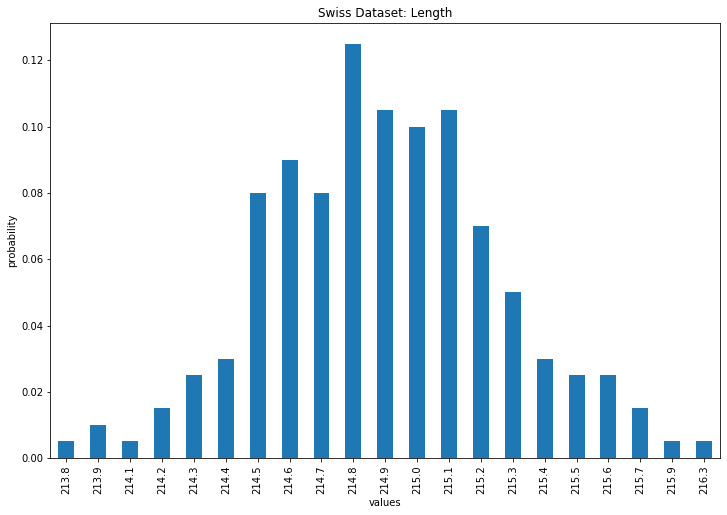

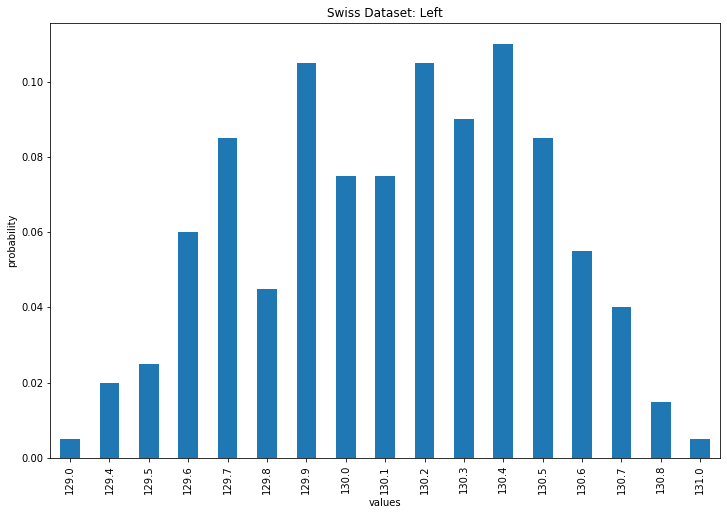

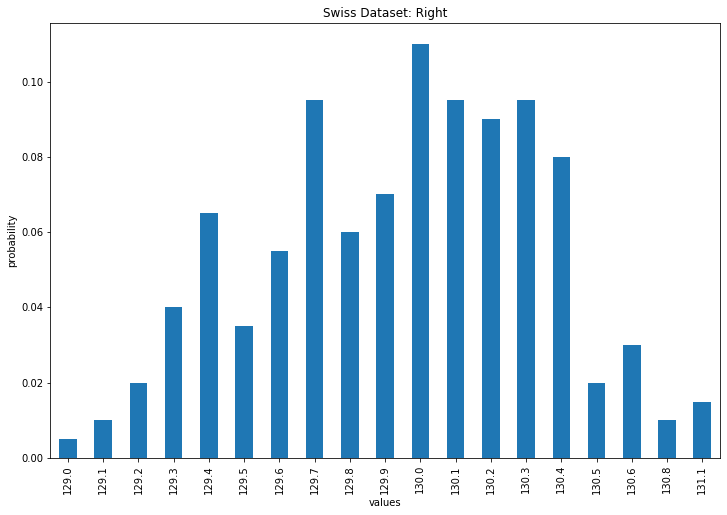

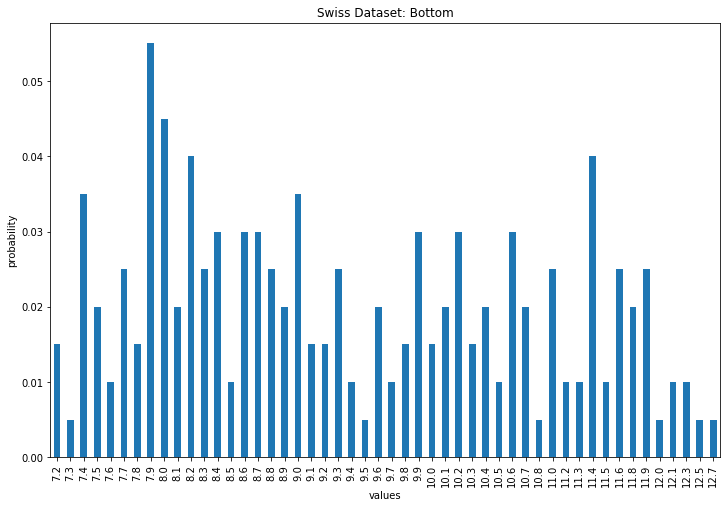

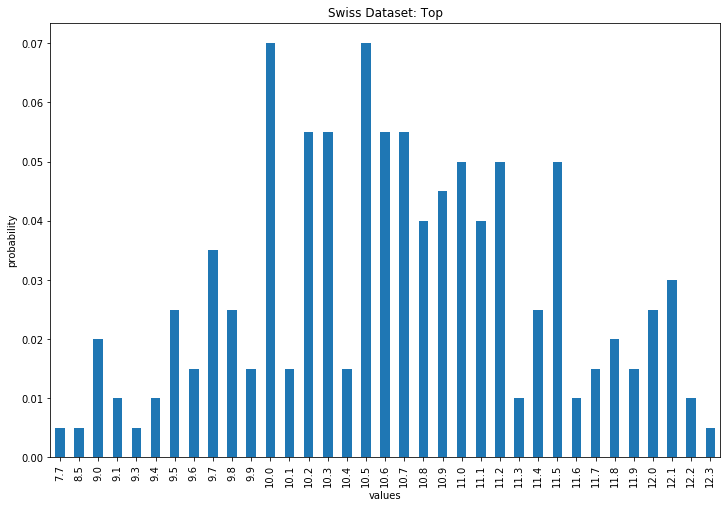

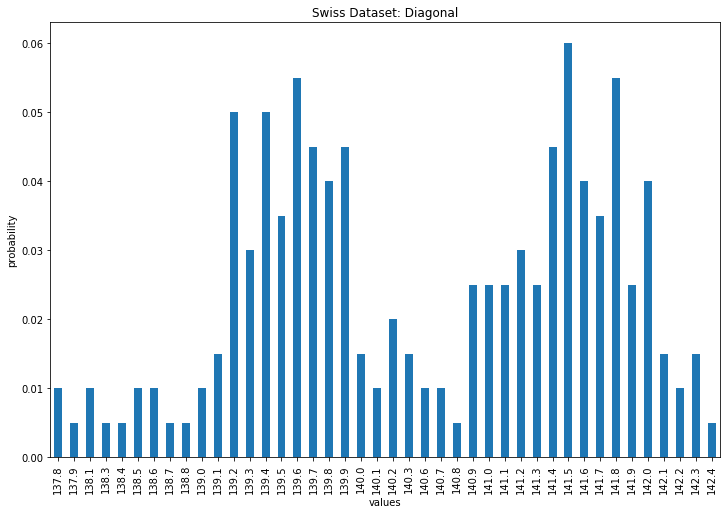

In [10]:
swissDataLengthLen = len(swissData["Length"])
swissDataLeftLen = len(swissData["Left"])
swissDataRightLen = len(swissData["Right"])
swissDataBottomLen = len(swissData["Bottom"])
swissDataTopLen = len(swissData["Top"])
swissDataDiagonalLen = len(swissData["Diagonal"])

swissDataLengthCountsPMF = swissDataLengthCounts/swissDataLengthLen
swissDataLengthCountsPMF.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Length")
plt.xlabel("values")
plt.ylabel("probability")
plt.show()
plt.close()
swissDataLeftCountsPMF = swissDataLeftCounts/swissDataLeftLen
swissDataLeftCountsPMF.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Left")
plt.xlabel("values")
plt.ylabel("probability")
plt.show()
plt.close()
swissDataRightCountsPMF = swissDataRightCounts/swissDataRightLen
swissDataRightCountsPMF.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Right")
plt.xlabel("values")
plt.ylabel("probability")
plt.show()
plt.close()
swissDataBottomCountsPMF = swissDataBottomCounts/swissDataBottomLen
swissDataBottomCountsPMF.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Bottom")
plt.xlabel("values")
plt.ylabel("probability")
plt.show()
plt.close()
swissDataTopCountsPMF = swissDataTopCounts/swissDataTopLen
swissDataTopCountsPMF.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Top")
plt.xlabel("values")
plt.ylabel("probability")
plt.show()
plt.close()
swissDataDiagonalCountsPMF = swissDataDiagonalCounts/swissDataDiagonalLen
swissDataDiagonalCountsPMF.sort_index().plot.bar(figsize = (12, 8))
plt.title("Swiss Dataset: Diagonal")
plt.xlabel("values")
plt.ylabel("probability")
plt.show()
plt.close()

#### 1.3 - Cumulative Density Function

Because of unique values of each variable is very little, it is more useful compute and plot the Cumulative Density Function (CDF) in order to understand if the variables conform to the same probability density. 

762    -1.39710
763     0.39012
764    -1.66770
765    -3.84830
766    -3.56810
         ...   
1367    0.40614
1368   -1.38870
1369   -3.75030
1370   -3.56370
1371   -2.54190
Name: wavelet_transformed_variance, Length: 610, dtype: float64
0      3.62160
1      4.54590
2      3.86600
3      3.45660
4      0.32924
        ...   
757    2.66060
758    3.93100
759    0.01727
760    3.24140
761    2.25040
Name: wavelet_transformed_variance, Length: 762, dtype: float64


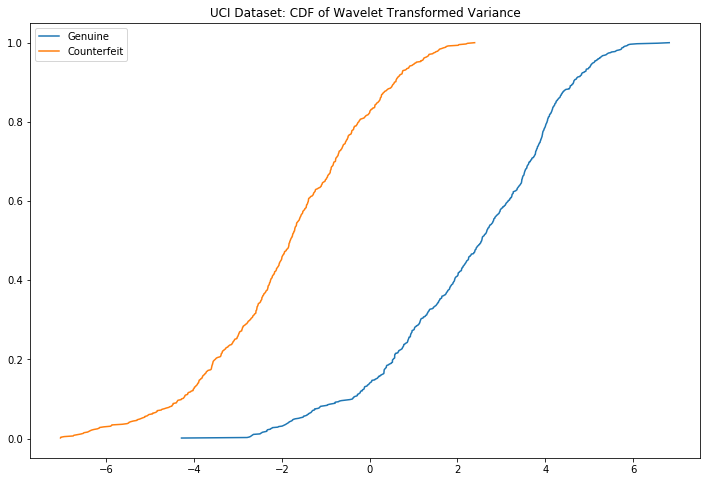

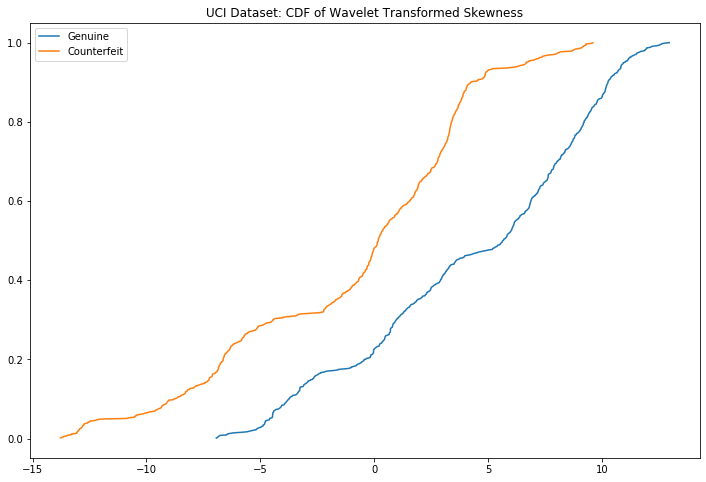

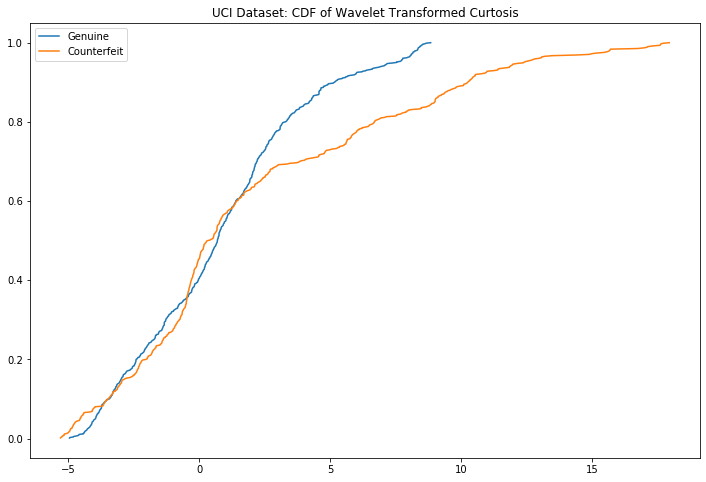

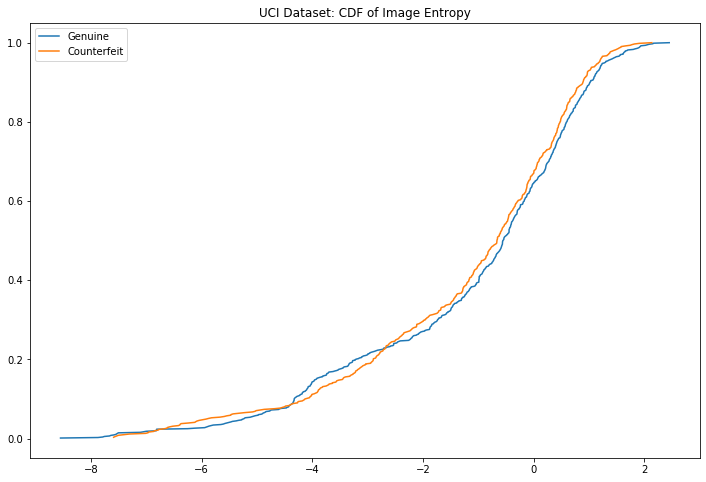

In [11]:
uciDataVarianceCDFCounterefeit = uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"].value_counts(normalize = True).sort_index().cumsum()
uciDataVarianceCDFGenuine = uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"].value_counts(normalize = True).sort_index().cumsum()
print(uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"])
print(uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"])
plt.figure(figsize=(12,8))
plt.plot(uciDataVarianceCDFGenuine.index, uciDataVarianceCDFGenuine.values)
plt.plot(uciDataVarianceCDFCounterefeit.index, uciDataVarianceCDFCounterefeit.values)
plt.legend(labels)
plt.title("UCI Dataset: CDF of Wavelet Transformed Variance")
plt.show()
plt.close()
uciDataSkewnessCDFCounterefeit = uciData[uciData["counterfeit"] == 1]["wavelet_transformed_skewness"].value_counts(normalize = True).sort_index().cumsum()
uciDataSkewnessCDFGenuine = uciData[uciData["counterfeit"] == 0]["wavelet_transformed_skewness"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(uciDataSkewnessCDFGenuine.index, uciDataSkewnessCDFGenuine.values)
plt.plot(uciDataSkewnessCDFCounterefeit.index, uciDataSkewnessCDFCounterefeit.values)
plt.legend(labels)
plt.title("UCI Dataset: CDF of Wavelet Transformed Skewness")
plt.show()
plt.close()
uciDataCurtosisCDFCounterefeit = uciData[uciData["counterfeit"] == 1]["wavelet_transformed_curtosis"].value_counts(normalize = True).sort_index().cumsum()
uciDataCurtosisCDFGenuine = uciData[uciData["counterfeit"] == 0]["wavelet_transformed_curtosis"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(uciDataCurtosisCDFGenuine.index, uciDataCurtosisCDFGenuine.values)
plt.plot(uciDataCurtosisCDFCounterefeit.index, uciDataCurtosisCDFCounterefeit.values)
plt.legend(labels)
plt.title("UCI Dataset: CDF of Wavelet Transformed Curtosis")
plt.show()
plt.close()
uciDataEntropyCDFCounterefeit = uciData[uciData["counterfeit"] == 1]["image_entropy"].value_counts(normalize = True).sort_index().cumsum()
uciDataEntropyCDFGenuine = uciData[uciData["counterfeit"] == 0]["image_entropy"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(uciDataEntropyCDFGenuine.index, uciDataEntropyCDFGenuine.values)
plt.plot(uciDataEntropyCDFCounterefeit.index, uciDataEntropyCDFCounterefeit.values)
plt.legend(labels)
plt.title("UCI Dataset: CDF of Image Entropy")
plt.show()
plt.close()

For *UCI Dataset* the results are:
* image entropy of both classes follows the same probability density;
* wavelet transformed curtosis of both classes conforms to the same probability density in first segment only;
* other variables don't have same probabilistic density.

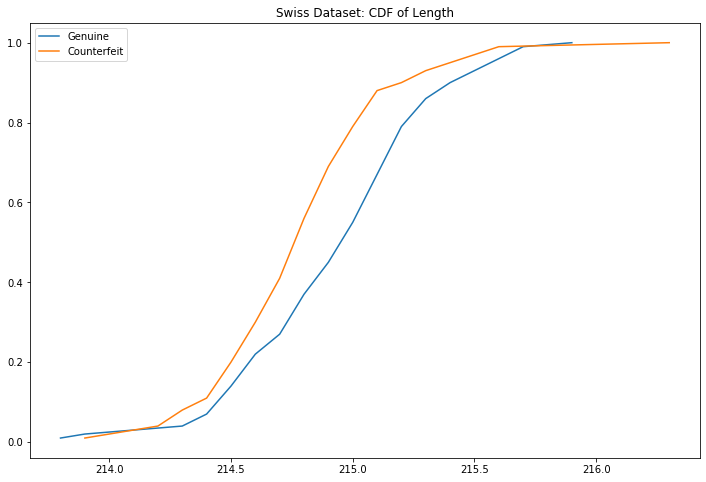

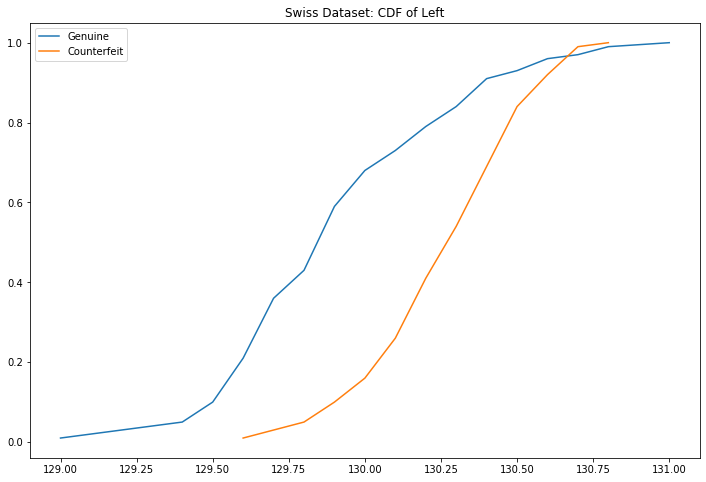

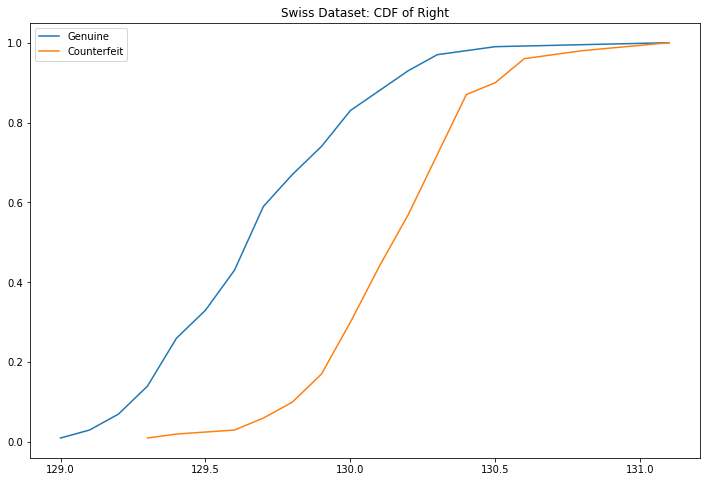

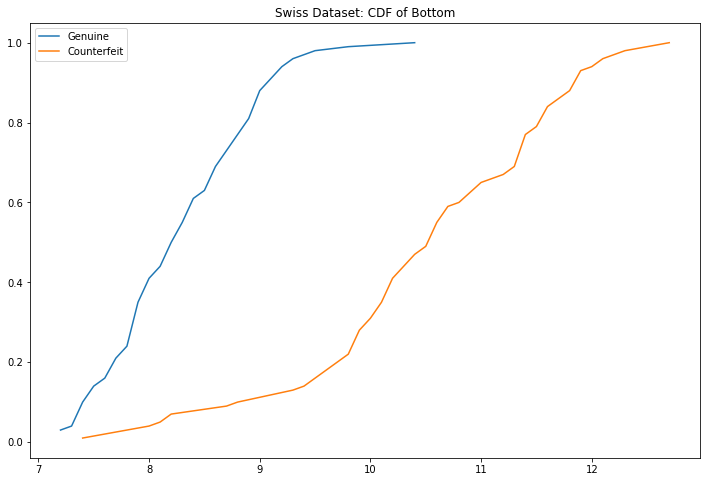

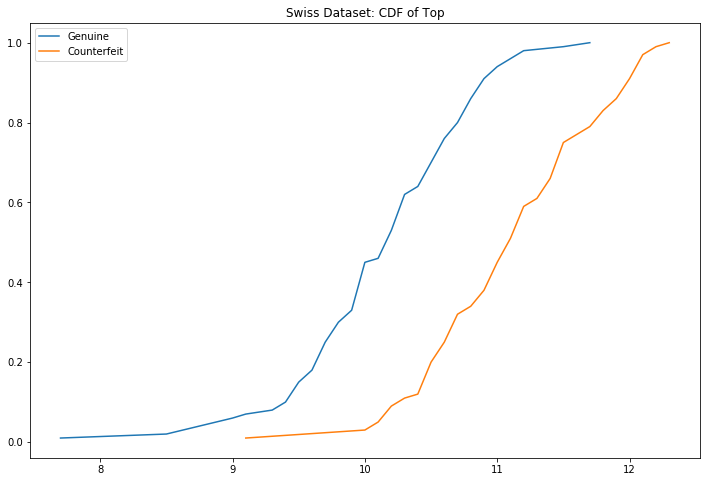

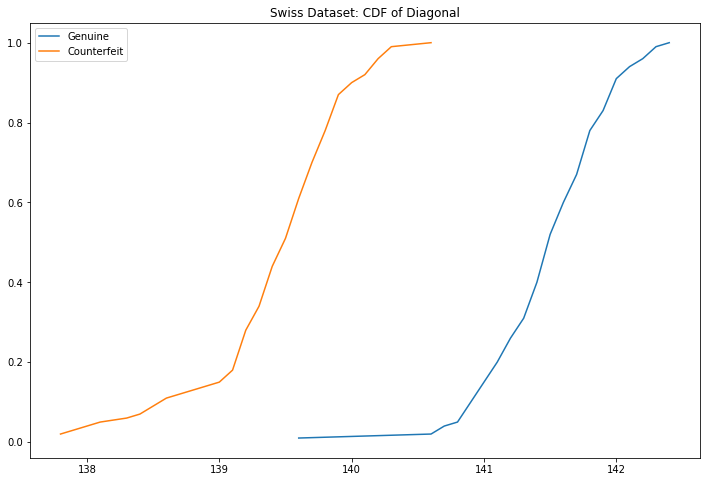

In [12]:
swissDataLengthCDFCounterefeit = swissData[swissData["Status"] == "counterfeit"]["Length"].value_counts(normalize = True).sort_index().cumsum()
swissDataLengthCDFGenuine = swissData[swissData["Status"] == "genuine"]["Length"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(swissDataLengthCDFGenuine.index, swissDataLengthCDFGenuine.values)
plt.plot(swissDataLengthCDFCounterefeit.index, swissDataLengthCDFCounterefeit.values)
plt.legend(labels)
plt.title("Swiss Dataset: CDF of Length")
plt.show()
plt.close()
swissDataLeftCDFCounterefeit = swissData[swissData["Status"] == "counterfeit"]["Left"].value_counts(normalize = True).sort_index().cumsum()
swissDataLeftCDFGenuine = swissData[swissData["Status"] == "genuine"]["Left"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(swissDataLeftCDFGenuine.index, swissDataLeftCDFGenuine.values)
plt.plot(swissDataLeftCDFCounterefeit.index, swissDataLeftCDFCounterefeit.values)
plt.legend(labels)
plt.title("Swiss Dataset: CDF of Left")
plt.show()
plt.close()
swissDataRightCDFCounterefeit = swissData[swissData["Status"] == "counterfeit"]["Right"].value_counts(normalize = True).sort_index().cumsum()
swissDataRightCDFGenuine = swissData[swissData["Status"] == "genuine"]["Right"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(swissDataRightCDFGenuine.index, swissDataRightCDFGenuine.values)
plt.plot(swissDataRightCDFCounterefeit.index, swissDataRightCDFCounterefeit.values)
plt.legend(labels)
plt.title("Swiss Dataset: CDF of Right")
plt.show()
plt.close()
swissDataBottomCDFCounterefeit = swissData[swissData["Status"] == "counterfeit"]["Bottom"].value_counts(normalize = True).sort_index().cumsum()
swissDataBottomCDFGenuine = swissData[swissData["Status"] == "genuine"]["Bottom"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(swissDataBottomCDFGenuine.index, swissDataBottomCDFGenuine.values)
plt.plot(swissDataBottomCDFCounterefeit.index, swissDataBottomCDFCounterefeit.values)
plt.legend(labels)
plt.title("Swiss Dataset: CDF of Bottom")
plt.show()
plt.close()
swissDataTopCDFCounterefeit = swissData[swissData["Status"] == "counterfeit"]["Top"].value_counts(normalize = True).sort_index().cumsum()
swissDataTopCDFGenuine = swissData[swissData["Status"] == "genuine"]["Top"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(swissDataTopCDFGenuine.index, swissDataTopCDFGenuine.values)
plt.plot(swissDataTopCDFCounterefeit.index, swissDataTopCDFCounterefeit.values)
plt.legend(labels)
plt.title("Swiss Dataset: CDF of Top")
plt.show()
plt.close()
swissDataDiagonalCDFCounterefeit = swissData[swissData["Status"] == "counterfeit"]["Diagonal"].value_counts(normalize = True).sort_index().cumsum()
swissDataDiagonalCDFGenuine = swissData[swissData["Status"] == "genuine"]["Diagonal"].value_counts(normalize = True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(swissDataDiagonalCDFGenuine.index, swissDataDiagonalCDFGenuine.values)
plt.plot(swissDataDiagonalCDFCounterefeit.index, swissDataDiagonalCDFCounterefeit.values)
plt.legend(labels)
plt.title("Swiss Dataset: CDF of Diagonal")
plt.show()
plt.close()

For *Swiss Dataset* the results are:
* only length of both classes conforms to the same probability density a little;
* other variables have similar probability density only in the shape but not in values except for bottom which has different function totally.

#### 1.4 - Probability Density Function

The Probability Density Function (PDF) allows to describe better the phenomenon and to make smaller the noise of measurement; its approximation is obtained trough the histogram for which data are divided in $b$ sub-set, where $b$ are the number of bins and it is chosen as default value ($b = 10$) or using Struge's standard ($b = 3.3 \: log(n)$) or Rice's standard ($b = 2 \: n^{1/3}$) where $n$ is cardinality of the sample.  
Note that the PDF satisfies:
$$\sum_{i=0}^{n} base_i \cdot height_i  = \int pdf(x)\:dx = 1 $$
Moreover, some non-parametric techniques could be used to estimate a density function that can be considered as "continuous version" of histogram [3]. These valuations are overlapped over every histograms.

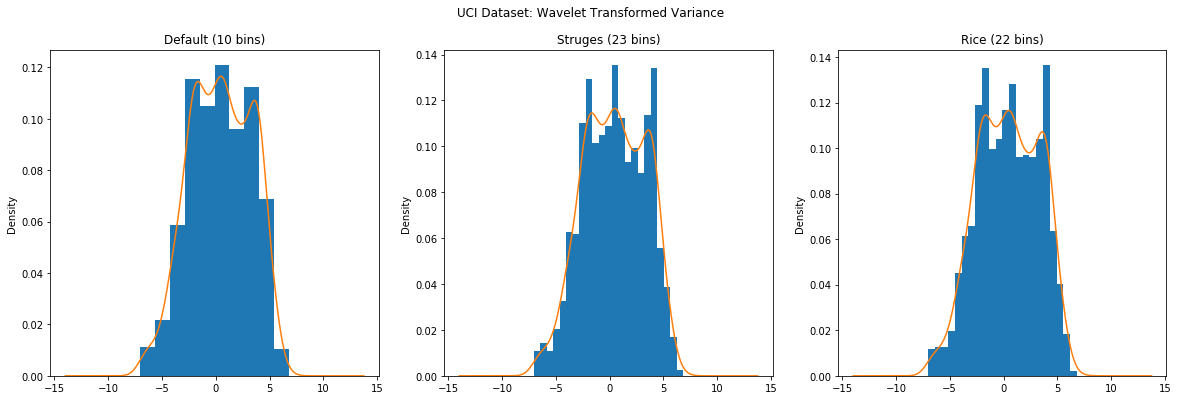

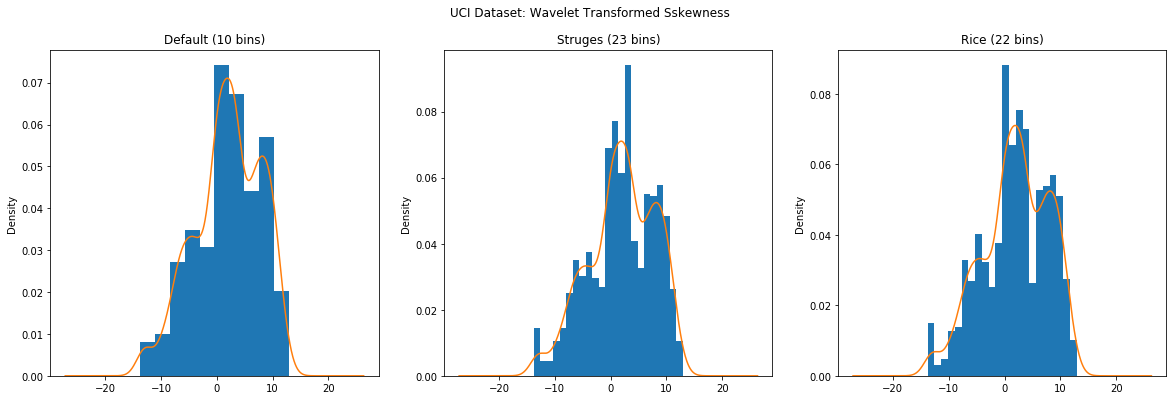

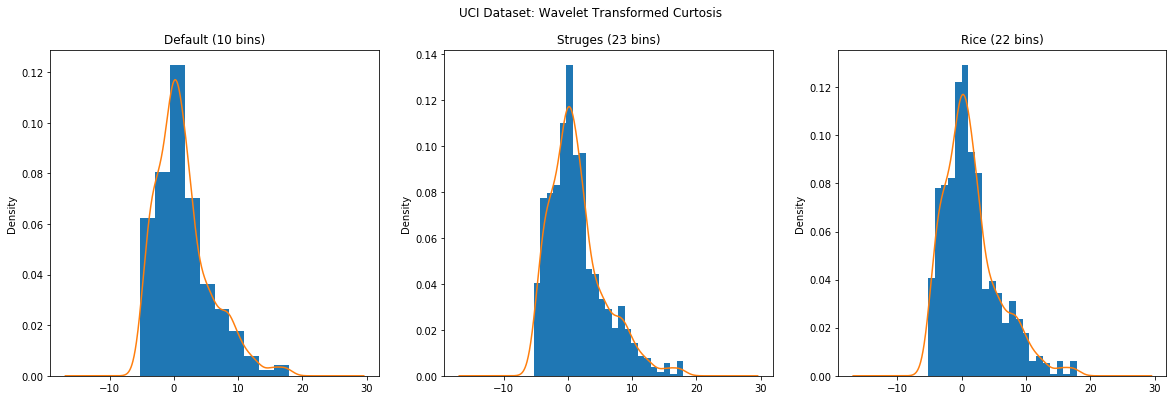

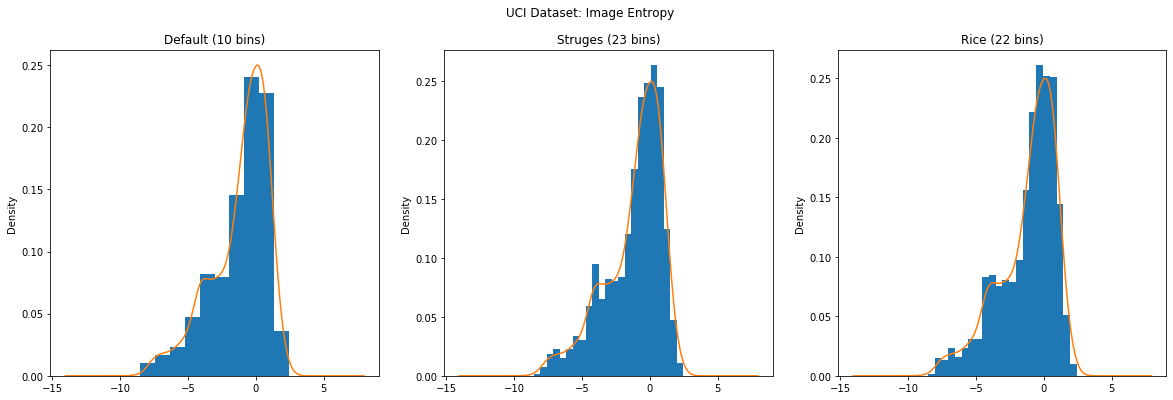

In [13]:
binsStruges = int(3.3*np.log(len(uciData['wavelet_transformed_variance'])))
binsRice = int(2*len(uciData['wavelet_transformed_variance'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("UCI Dataset: Wavelet Transformed Variance")
plt.subplot(131)
plt.hist(uciData['wavelet_transformed_variance'], density = True)
uciData['wavelet_transformed_variance'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(uciData['wavelet_transformed_variance'], bins = binsStruges, density = True)
uciData['wavelet_transformed_variance'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(uciData['wavelet_transformed_variance'], bins = binsRice, density = True)
uciData['wavelet_transformed_variance'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(uciData['wavelet_transformed_skewness'])))
binsRice = int(2*len(uciData['wavelet_transformed_skewness'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("UCI Dataset: Wavelet Transformed Sskewness")
plt.subplot(131)
plt.hist(uciData['wavelet_transformed_skewness'], density = True)
uciData['wavelet_transformed_skewness'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(uciData['wavelet_transformed_skewness'], bins = binsStruges, density = True)
uciData['wavelet_transformed_skewness'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(uciData['wavelet_transformed_skewness'], bins = binsRice, density = True)
uciData['wavelet_transformed_skewness'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(uciData['wavelet_transformed_curtosis'])))
binsRice = int(2*len(uciData['wavelet_transformed_curtosis'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("UCI Dataset: Wavelet Transformed Curtosis")
plt.subplot(131)
plt.hist(uciData['wavelet_transformed_curtosis'], density = True)
uciData['wavelet_transformed_curtosis'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(uciData['wavelet_transformed_curtosis'], bins = binsStruges, density = True)
uciData['wavelet_transformed_curtosis'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(uciData['wavelet_transformed_curtosis'], bins = binsRice, density = True)
uciData['wavelet_transformed_curtosis'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(uciData['image_entropy'])))
binsRice = int(2*len(uciData['image_entropy'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("UCI Dataset: Image Entropy")
plt.subplot(131)
plt.hist(uciData['image_entropy'], density = True)
uciData['image_entropy'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(uciData['image_entropy'], bins = binsStruges, density = True)
uciData['image_entropy'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(uciData['image_entropy'], bins = binsRice, density = True)
uciData['image_entropy'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()

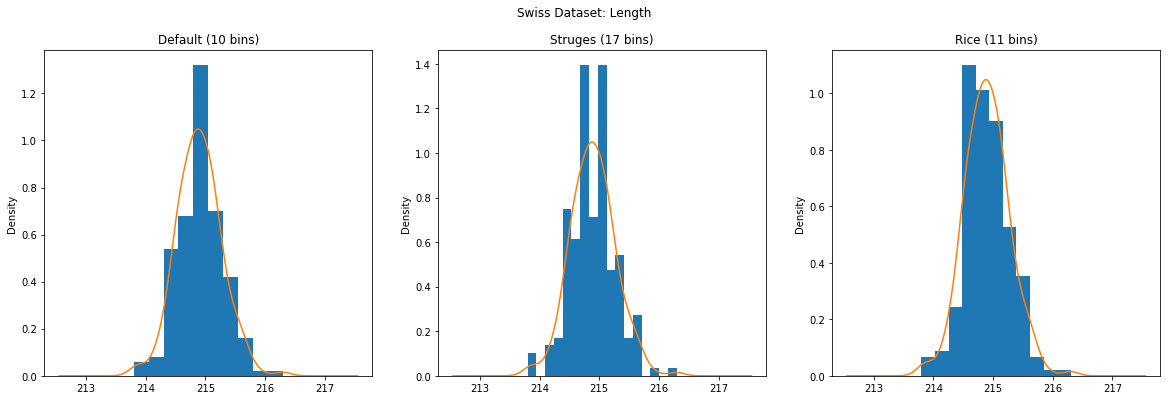

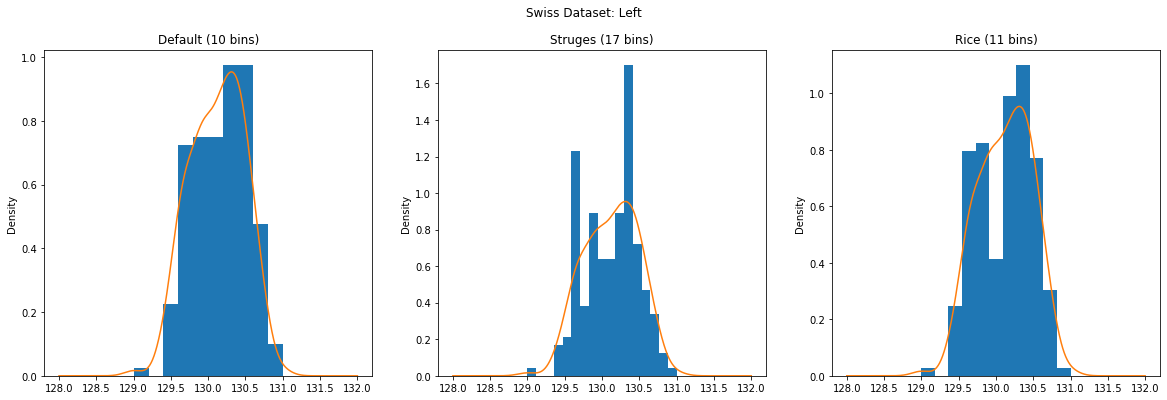

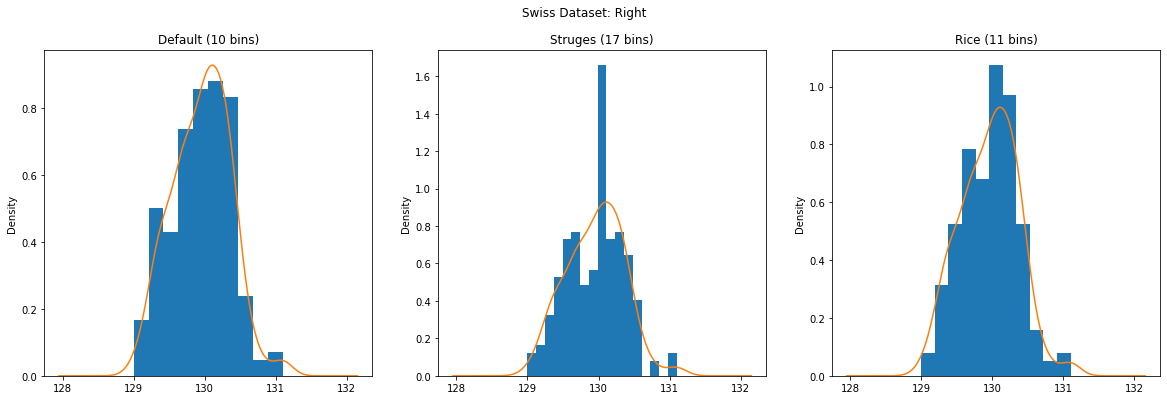

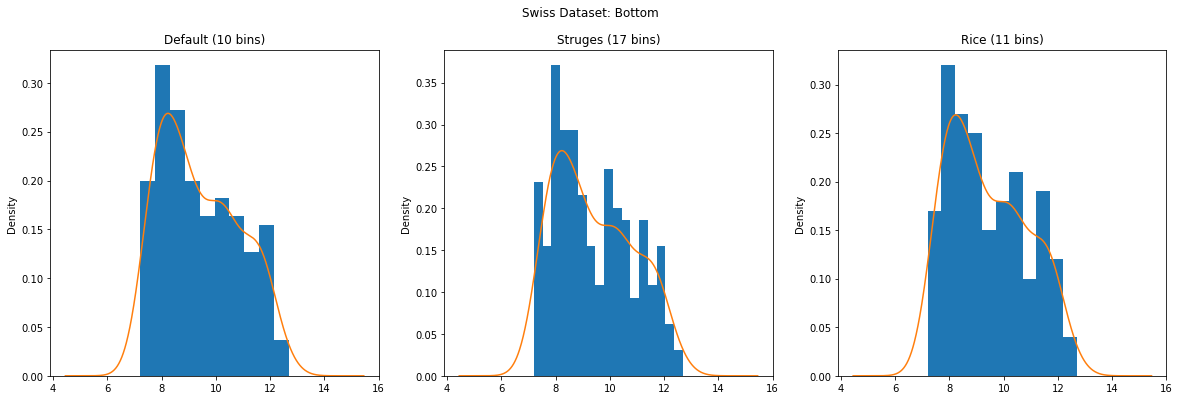

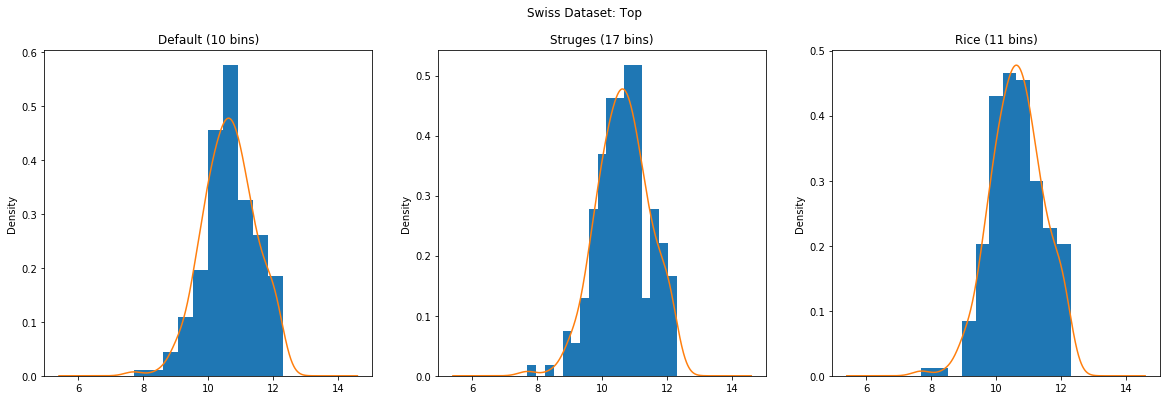

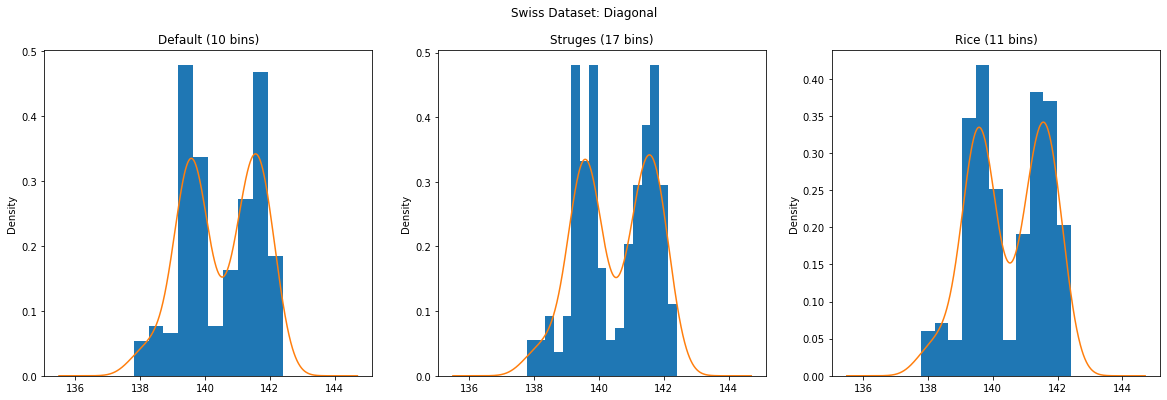

In [14]:
binsStruges = int(3.3*np.log(len(swissData['Length'])))
binsRice = int(2*len(swissData['Length'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("Swiss Dataset: Length")
plt.subplot(131)
plt.hist(swissData['Length'], density = True)
swissData['Length'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(swissData['Length'], bins = binsStruges, density = True)
swissData['Length'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(swissData['Length'], bins = binsRice, density = True)
swissData['Length'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(swissData['Left'])))
binsRice = int(2*len(swissData['Left'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("Swiss Dataset: Left")
plt.subplot(131)
plt.hist(swissData['Left'], density = True)
swissData['Left'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(swissData['Left'], bins = binsStruges, density = True)
swissData['Left'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(swissData['Left'], bins = binsRice, density = True)
swissData['Left'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(swissData['Right'])))
binsRice = int(2*len(swissData['Right'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("Swiss Dataset: Right")
plt.subplot(131)
plt.hist(swissData['Right'], density = True)
swissData['Right'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(swissData['Right'], bins = binsStruges, density = True)
swissData['Right'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(swissData['Right'], bins = binsRice, density = True)
swissData['Right'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(swissData['Bottom'])))
binsRice = int(2*len(swissData['Bottom'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("Swiss Dataset: Bottom")
plt.subplot(131)
plt.hist(swissData['Bottom'], density = True)
swissData['Bottom'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(swissData['Bottom'], bins = binsStruges, density = True)
swissData['Bottom'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(swissData['Bottom'], bins = binsRice, density = True)
swissData['Bottom'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(swissData['Top'])))
binsRice = int(2*len(swissData['Top'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("Swiss Dataset: Top")
plt.subplot(131)
plt.hist(swissData['Top'], density = True)
swissData['Top'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(swissData['Top'], bins = binsStruges, density = True)
swissData['Top'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(swissData['Top'], bins = binsRice, density = True)
swissData['Top'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()
binsStruges = int(3.3*np.log(len(swissData['Diagonal'])))
binsRice = int(2*len(swissData['Diagonal'])**(1/3))
plt.figure(figsize=(20,6))
plt.suptitle("Swiss Dataset: Diagonal")
plt.subplot(131)
plt.hist(swissData['Diagonal'], density = True)
swissData['Diagonal'].plot.density()
plt.title("Default (10 bins)")
plt.subplot(132)
plt.hist(swissData['Diagonal'], bins = binsStruges, density = True)
swissData['Diagonal'].plot.density()
plt.title("Struges ({} bins)".format(binsStruges))
plt.subplot(133)
plt.hist(swissData['Diagonal'], bins = binsRice, density = True)
swissData['Diagonal'].plot.density()
plt.title("Rice ({} bins)".format(binsRice))
plt.show()
plt.close()

#### 1.5 - Central Tendency: Mean, Median and Mode

Mean, median and mode computed on *UCI Dataset*:

In [15]:
print("Mean for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].mean())
print("Mean for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].mean())
print("Mean for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].mean())
print("Mean for Image Entropy: ", uciData["image_entropy"].mean())
print()
print("Median for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].median())
print("Median for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].median())
print("Median for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].median())
print("Median for Image Entropy: ", uciData["image_entropy"].median())
print()
print("Mode for Wavelet Transformed Variance:\n", uciData["wavelet_transformed_variance"].mode())
print("Mode for Wavelet Transformed Skewness:\n", uciData["wavelet_transformed_skewness"].mode())
print("Mode for Wavelet Transformed Curtosis:\n", uciData["wavelet_transformed_curtosis"].mode())
print("Mode for Image Entropy:\n", uciData["image_entropy"].mode())

Mean for Wavelet Transformed Variance:  0.43373525728862977
Mean for Wavelet Transformed Skewness:  1.9223531209912554
Mean for Wavelet Transformed Curtosis:  1.3976271166180774
Mean for Image Entropy:  -1.1916565211370254

Median for Wavelet Transformed Variance:  0.49618
Median for Wavelet Transformed Skewness:  2.31965
Median for Wavelet Transformed Curtosis:  0.61663
Median for Image Entropy:  -0.58665

Mode for Wavelet Transformed Variance:
 0    0.5706
dtype: float64
Mode for Wavelet Transformed Skewness:
 0   -4.4552
dtype: float64
Mode for Wavelet Transformed Curtosis:
 0    1.2421
1    3.0895
2    4.5718
dtype: float64
Mode for Image Entropy:
 0   -0.9888
1   -0.2957
dtype: float64


Because of mean and median of variables are unlike, they are computed for each class separately. Also, mode is computed in this manner.

In [16]:
print("Mean for Wavelet Transformed Variance - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"].mean())
print("Mean for Wavelet Transformed Variance - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"].mean())
print("Mean for Wavelet Transformed Skewness - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_skewness"].mean())
print("Mean for Wavelet Transformed Skewness - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_skewness"].mean())
print("Mean for Wavelet Transformed Curtosis - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_curtosis"].mean())
print("Mean for Wavelet Transformed Curtosis - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_curtosis"].mean())
print("Mean for Image Entropy - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["image_entropy"].mean())
print("Mean for Image Entropy - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["image_entropy"].mean())
print()
print("Median for Wavelet Transformed Variance - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"].median())
print("Median for Wavelet Transformed Variance - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"].median())
print("Median for Wavelet Transformed Skewness - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_skewness"].median())
print("Median for Wavelet Transformed Skewness - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_skewness"].median())
print("Median for Wavelet Transformed Curtosis - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_curtosis"].median())
print("Median for Wavelet Transformed Curtosis - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_curtosis"].median())
print("Median for Image Entropy - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["image_entropy"].median())
print("Median for Image Entropy - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["image_entropy"].median())
print()
print("Mode for Wavelet Transformed Variance - Genuine Class:\n", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"].mode())
print("Mode for Wavelet Transformed Variance - Counterfeit Class:\n", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"].mode())
print("Mode for Wavelet Transformed Skewness - Genuine Class:\n", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_skewness"].mode())
print("Mode for Wavelet Transformed Skewness - Counterfeit Class:\n", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_skewness"].mode())
print("Mode for Wavelet Transformed Curtosis - Genuine Class:\n", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_curtosis"].mode())
print("Mode for Wavelet Transformed Curtosis - Counterfeit Class:\n", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_curtosis"].mode())
print("Mode for Image Entropy - Genuine Class:\n", uciData[uciData["counterfeit"] == 0]["image_entropy"].mode())
print("Mode for Image Entropy - Counterfeit Class:\n", uciData[uciData["counterfeit"] == 1]["image_entropy"].mode())

Mean for Wavelet Transformed Variance - Genuine Class:  2.2766860052493447
Mean for Wavelet Transformed Variance - Counterfeit Class:  -1.8684425622950798
Mean for Wavelet Transformed Skewness - Genuine Class:  4.25662718897638
Mean for Wavelet Transformed Skewness - Counterfeit Class:  -0.9935761245901634
Mean for Wavelet Transformed Curtosis - Genuine Class:  0.7967179645669292
Mean for Wavelet Transformed Curtosis - Counterfeit Class:  2.148271008196724
Mean for Image Entropy - Genuine Class:  -1.1476402769028875
Mean for Image Entropy - Counterfeit Class:  -1.246640747540983

Median for Wavelet Transformed Variance - Genuine Class:  2.5530999999999997
Median for Wavelet Transformed Variance - Counterfeit Class:  -1.8061
Median for Wavelet Transformed Skewness - Genuine Class:  5.6688
Median for Wavelet Transformed Skewness - Counterfeit Class:  0.172775
Median for Wavelet Transformed Curtosis - Genuine Class:  0.700605
Median for Wavelet Transformed Curtosis - Counterfeit Class:  0

In this approach the distance between mean and median is shorter for every variable in own respective classes except for skewness for only counterfeit class and curtosis for both classes. Moreover mean and median are similiar for both classes of entropy variable.  
Note that counterfeit records have multi-modal profile.

Mean, median and mode for *Swiss Dataset*:

In [17]:
print("Mean for Length: ", swissData["Length"].mean())
print("Mean for Left: ", swissData["Left"].mean())
print("Mean for Right: ", swissData["Right"].mean())
print("Mean for Bottom: ", swissData["Bottom"].mean())
print("Mean for Top: ", swissData["Top"].mean())
print("Mean for Diagonal: ", swissData["Diagonal"].mean())
print()
print("Median for Length: ", swissData["Length"].median())
print("Median for Left: ", swissData["Left"].median())
print("Median for Right: ", swissData["Right"].median())
print("Median for Bottom: ", swissData["Bottom"].median())
print("Median for Top: ", swissData["Top"].median())
print("Median for Diagonal: ", swissData["Diagonal"].median())
print()
print("Mode for Length:\n", swissData["Length"].mode())
print("Mode for Left:\n", swissData["Left"].mode())
print("Mode for Right:\n", swissData["Right"].mode())
print("Mode for Bottom:\n", swissData["Bottom"].mode())
print("Mode for Top:\n", swissData["Top"].mode())
print("Mode for Diagonal:\n", swissData["Diagonal"].mode())

Mean for Length:  214.89600000000013
Mean for Left:  130.12150000000003
Mean for Right:  129.95649999999998
Mean for Bottom:  9.4175
Mean for Top:  10.650499999999997
Mean for Diagonal:  140.4835

Median for Length:  214.9
Median for Left:  130.2
Median for Right:  130.0
Median for Bottom:  9.1
Median for Top:  10.6
Median for Diagonal:  140.45

Mode for Length:
 0    214.8
dtype: float64
Mode for Left:
 0    130.4
dtype: float64
Mode for Right:
 0    130.0
dtype: float64
Mode for Bottom:
 0    7.9
dtype: float64
Mode for Top:
 0    10.0
1    10.5
dtype: float64
Mode for Diagonal:
 0    141.5
dtype: float64


Mean and median are very near for each variable and it keeps out presence of outliers. Moreover, every variable has single mode.

#### 1.6 - Dispersion Measure: Minimum, Maximum, Range, Quantile, Percentile, Quartile, Interquantile Range and Variance

For *Uci Dataset* minimum, maximum and (normalized) range are:

In [18]:
print("Minimum for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].min())
print("Minimum for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].min())
print("Minimum for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].min())
print("Minimum for Image Entropy: ", uciData["image_entropy"].min())
print()
print("Maximum for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].max())
print("Maximum for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].max())
print("Maximum for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].max())
print("Maximum for Image Entropy: ", uciData["image_entropy"].max())
print()
print("Not normalized range for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].max()-uciData["wavelet_transformed_variance"].min())
print("Not normalized range for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].max()-uciData["wavelet_transformed_skewness"].min())
print("Not normalized range for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].max()-uciData["wavelet_transformed_curtosis"].min())
print("Not normalized range for Image Entropy: ", uciData["image_entropy"].max()-uciData["image_entropy"].min())

Minimum for Wavelet Transformed Variance:  -7.0421
Minimum for Wavelet Transformed Skewness:  -13.7731
Minimum for Wavelet Transformed Curtosis:  -5.2861
Minimum for Image Entropy:  -8.5482

Maximum for Wavelet Transformed Variance:  6.8248
Maximum for Wavelet Transformed Skewness:  12.9516
Maximum for Wavelet Transformed Curtosis:  17.9274
Maximum for Image Entropy:  2.4495

Not normalized range for Wavelet Transformed Variance:  13.8669
Not normalized range for Wavelet Transformed Skewness:  26.7247
Not normalized range for Wavelet Transformed Curtosis:  23.2135
Not normalized range for Image Entropy:  10.9977


As expected from previous plots, the range of data are very wide for each variable.

Normalization of range in [0,1]: $$x_{norm} = (x-x_{min})/(x_{max}-x_{min})$$

In [9]:
uciDataVarianceNorm01 = (uciData["wavelet_transformed_variance"] - uciData["wavelet_transformed_variance"].min())/(uciData["wavelet_transformed_variance"].max() - uciData["wavelet_transformed_variance"].min())
print("Verify maximum and minimum for Wavelet Tranformed Variance: ", "%.2f"%uciDataVarianceNorm01.max(), "%.2f"%uciDataVarianceNorm01.min())
uciDataSkewnessNorm01 = (uciData["wavelet_transformed_skewness"] - uciData["wavelet_transformed_skewness"].min())/(uciData["wavelet_transformed_skewness"].max() - uciData["wavelet_transformed_skewness"].min())
print("Verify maximum and minimum for Wavelet Tranformed Skewness: ", "%.2f"%uciDataSkewnessNorm01.max(), "%.2f"%uciDataSkewnessNorm01.min())
uciDataCurtosisNorm01 = (uciData["wavelet_transformed_curtosis"] - uciData["wavelet_transformed_curtosis"].min())/(uciData["wavelet_transformed_curtosis"].max() - uciData["wavelet_transformed_curtosis"].min())
print("Verify maximum and minimum for Wavelet Tranformed Curtosis: ", "%.2f"%uciDataCurtosisNorm01.max(), "%.2f"%uciDataCurtosisNorm01.min())
uciDataEntropyNorm01 = (uciData["image_entropy"] - uciData["image_entropy"].min())/(uciData["image_entropy"].max() - uciData["image_entropy"].min())
print("Verify maximum and minimum for Image Entropy: ", "%.2f"%uciDataEntropyNorm01.max(), "%.2f"%uciDataEntropyNorm01.min())

Verify maximum and minimum for Wavelet Tranformed Variance:  1.00 0.00
Verify maximum and minimum for Wavelet Tranformed Skewness:  1.00 0.00
Verify maximum and minimum for Wavelet Tranformed Curtosis:  1.00 0.00
Verify maximum and minimum for Image Entropy:  1.00 0.00
<class 'pandas.core.series.Series'>


Normalization of range in [-1,1]: $$x_{norm} = (x_{max} + x_{min} - 2x)/(x_{max} - x_{min})$$

In [20]:
uciDataVarianceNorm11 = (uciData["wavelet_transformed_variance"].max() + uciData["wavelet_transformed_variance"].min() - 2*uciData["wavelet_transformed_variance"])/(uciData["wavelet_transformed_variance"].max() - uciData["wavelet_transformed_variance"].min())
print("Verify maximum and minimum for Wavelet Tranformed Variance: ", "%.2f"%uciDataVarianceNorm11.max(), "%.2f"%uciDataVarianceNorm11.min())
uciDataSkewnessNorm11 = (uciData["wavelet_transformed_skewness"].max() + uciData["wavelet_transformed_skewness"].min() - 2*uciData["wavelet_transformed_skewness"])/(uciData["wavelet_transformed_skewness"].max() - uciData["wavelet_transformed_skewness"].min())
print("Verify maximum and minimum for Wavelet Tranformed Skewness: ", "%.2f"%uciDataSkewnessNorm11.max(), "%.2f"%uciDataSkewnessNorm11.min())
uciDataCurtosisNorm11 = (uciData["wavelet_transformed_curtosis"].max() + uciData["wavelet_transformed_curtosis"].min() - 2*uciData["wavelet_transformed_curtosis"])/(uciData["wavelet_transformed_curtosis"].max() - uciData["wavelet_transformed_curtosis"].min())
print("Verify maximum and minimum for Wavelet Tranformed Curtosis: ", "%.2f"%uciDataCurtosisNorm11.max(), "%.2f"%uciDataCurtosisNorm11.min())
uciDataEntropyNorm11 = (uciData["image_entropy"].max() + uciData["image_entropy"].min() - 2*uciData["image_entropy"])/(uciData["image_entropy"].max() - uciData["image_entropy"].min())
print("Verify maximum and minimum for Entropy: ", "%.2f"%uciDataEntropyNorm11.max(), "%.2f"%uciDataEntropyNorm11.min())

Verify maximum and minimum for Wavelet Tranformed Variance:  1.00 -1.00
Verify maximum and minimum for Wavelet Tranformed Skewness:  1.00 -1.00
Verify maximum and minimum for Wavelet Tranformed Curtosis:  1.00 -1.00
Verify maximum and minimum for Entropy:  1.00 -1.00


For *Swiss Dataset* minimum, maximum and (normalized) range are:

In [21]:
print("Minimum for Length: ", swissData["Length"].min())
print("Minimum for Left: ", swissData["Left"].min())
print("Minimum for Right: ", swissData["Right"].min())
print("Minimum for Bottom: ", swissData["Bottom"].min())
print("Minimum for Top: ", swissData["Top"].min())
print("Minimum for Diagonal: ", swissData["Diagonal"].min())
print()
print("Maximum for Length: ", swissData["Length"].max())
print("Maximum for Left: ", swissData["Left"].max())
print("Maximum for Right: ", swissData["Right"].max())
print("Maximum for Bottom: ", swissData["Bottom"].max())
print("Maximum for Top: ", swissData["Top"].max())
print("Maximum for Diagonal: ", swissData["Diagonal"].max())
print()
print("Not normalized range for Length: ", swissData["Length"].max() - swissData["Length"].min())
print("Not normalized range for Left: ", swissData["Left"].max() - swissData["Left"].min())
print("Not normalized range for Right: ", swissData["Right"].max() - swissData["Right"].min())
print("Not normalized range for Bottom: ", swissData["Bottom"].max() - swissData["Bottom"].min())
print("Not normalized range for Top: ", swissData["Top"].max() - swissData["Top"].min())
print("Not normalized range for Diagonal: ", swissData["Diagonal"].max() - swissData["Diagonal"].min())

Minimum for Length:  213.8
Minimum for Left:  129.0
Minimum for Right:  129.0
Minimum for Bottom:  7.2
Minimum for Top:  7.7
Minimum for Diagonal:  137.8

Maximum for Length:  216.3
Maximum for Left:  131.0
Maximum for Right:  131.1
Maximum for Bottom:  12.7
Maximum for Top:  12.3
Maximum for Diagonal:  142.4

Not normalized range for Length:  2.5
Not normalized range for Left:  2.0
Not normalized range for Right:  2.0999999999999943
Not normalized range for Bottom:  5.499999999999999
Not normalized range for Top:  4.6000000000000005
Not normalized range for Diagonal:  4.599999999999994


Normalization of range in [0,1]: $$x_{norm} = (x-x_{min})/(x_{max}-x_{min})$$

In [22]:
swissDataLengthNorm01 = (swissData["Length"] - swissData["Length"].min())/(swissData["Length"].max() - swissData["Length"].min())
print("Verify maximum and minimum for Length: ", "%.2f"%swissDataLengthNorm01.max(), "%.2f"%swissDataLengthNorm01.min())
swissDataLeftNorm01 = (swissData["Left"] - swissData["Left"].min())/(swissData["Left"].max() - swissData["Left"].min())
print("Verify maximum and minimum for Left: ", "%.2f"%swissDataLeftNorm01.max(), "%.2f"%swissDataLeftNorm01.min())
swissDataRightNorm01 = (swissData["Right"] - swissData["Right"].min())/(swissData["Right"].max() - swissData["Right"].min())
print("Verify maximum and minimum for Right: ", "%.2f"%swissDataRightNorm01.max(), "%.2f"%swissDataRightNorm01.min())
swissDataBottomNorm01 = (swissData["Bottom"] - swissData["Bottom"].min())/(swissData["Bottom"].max() - swissData["Bottom"].min())
print("Verify maximum and minimum for Bottom: ", "%.2f"%swissDataBottomNorm01.max(), "%.2f"%swissDataBottomNorm01.min())
swissDataTopNorm01 = (swissData["Top"] - swissData["Top"].min())/(swissData["Top"].max() - swissData["Top"].min())
print("Verify maximum and minimum for Top: ", "%.2f"%swissDataTopNorm01.max(), "%.2f"%swissDataTopNorm01.min())
swissDataDiagonalNorm01 = (swissData["Diagonal"] - swissData["Diagonal"].min())/(swissData["Diagonal"].max() - swissData["Diagonal"].min())
print("Verify maximum and minimum for Diagonal: ", "%.2f"%swissDataDiagonalNorm01.max(), "%.2f"%swissDataDiagonalNorm01.min())

Verify maximum and minimum for Length:  1.00 0.00
Verify maximum and minimum for Left:  1.00 0.00
Verify maximum and minimum for Right:  1.00 0.00
Verify maximum and minimum for Bottom:  1.00 0.00
Verify maximum and minimum for Top:  1.00 0.00
Verify maximum and minimum for Diagonal:  1.00 0.00


Normalization of range in [-1,1]: $$x_{norm} = (x_{max} + x_{min} - 2x)/(x_{max} - x_{min})$$

In [23]:
swissDataLengthNorm11 = (swissData["Length"].max() + swissData["Length"].min() - 2*swissData["Length"])/(swissData["Length"].max() - swissData["Length"].min())
print("Verify maximum and minimum for Length: ", "%.2f"%swissDataLengthNorm11.max(), "%.2f"%swissDataLengthNorm11.min())
swissDataLeftNorm11 = (swissData["Left"].max() + swissData["Left"].min() - 2*swissData["Left"])/(swissData["Left"].max() - swissData["Left"].min())
print("Verify maximum and minimum for Left: ", "%.2f"%swissDataLeftNorm11.max(), "%.2f"%swissDataLeftNorm11.min())
swissDataRightNorm11 = (swissData["Right"].max() + swissData["Right"].min() - 2*swissData["Right"])/(swissData["Right"].max() - swissData["Right"].min())
print("Verify maximum and minimum for Right: ","%.2f"%swissDataRightNorm11.max(), "%.2f"%swissDataRightNorm11.min())
swissDataBottomNorm11 = (swissData["Bottom"].max() + swissData["Bottom"].min() - 2*swissData["Bottom"])/(swissData["Bottom"].max() - swissData["Bottom"].min())
print("Verify maximum and minimum for Bottom: ", "%.2f"%swissDataBottomNorm11.max(), "%.2f"%swissDataBottomNorm11.min())
swissDataTopNorm11 = (swissData["Top"].max() + swissData["Top"].min() - 2*swissData["Top"])/(swissData["Top"].max() - swissData["Top"].min())
print("Verify maximum and minimum for Top: ", "%.2f"%swissDataTopNorm11.max(), "%.2f"%swissDataTopNorm11.min())
swissDataDiagonalNorm11 = (swissData["Diagonal"].max() + swissData["Diagonal"].min() - 2*swissData["Diagonal"])/(swissData["Diagonal"].max() - swissData["Diagonal"].min())
print("Verify maximum and minimum for Diagonal: ", "%.2f"%swissDataDiagonalNorm11.max(), "%.2f"%swissDataDiagonalNorm11.min())

Verify maximum and minimum for Length:  1.00 -1.00
Verify maximum and minimum for Left:  1.00 -1.00
Verify maximum and minimum for Right:  1.00 -1.00
Verify maximum and minimum for Bottom:  1.00 -1.00
Verify maximum and minimum for Top:  1.00 -1.00
Verify maximum and minimum for Diagonal:  1.00 -1.00


For *Uci Dataset* quantiles, percentiles and quartiles are:

In [24]:
print("Quantile of order 0 (minimum) for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(0))
print("Quantile of order 0.5 (median) for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(0.5))
print("Quantile of order 1 (maximum) for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(0))
print("Quantile of order 0.5 (median) for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(0.5))
print("Quantile of order 1 (maximum) for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(0))
print("Quantile of order 0.5 (median) for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(0.5))
print("Quantile of order 1 (maximum) for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Image Entropy: ", uciData["image_entropy"].quantile(0))
print("Quantile of order 0.5 (median) for Image Entropy: ", uciData["image_entropy"].quantile(0.5))
print("Quantile of order 1 (maximum) for Image Entropy: ", uciData["image_entropy"].quantile(1))
print()
print("Percentile of order 50% (median) for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Image Entropy: ", uciData["image_entropy"].quantile(50/100))
print()
print("Quartile of order 0 (minimum) for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(0/4))
print("Quartile of order 1 for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(1/4))
print("Quartile of order 2 (median) for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(2/4))
print("Quartile of order 3 for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(3/4))
print("Quartile of order 4 (maximum) for Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(0/4))
print("Quartile of order 1 for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(1/4))
print("Quartile of order 2 (median) for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(2/4))
print("Quartile of order 3 for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(3/4))
print("Quartile of order 4 (maximum) for Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(0/4))
print("Quartile of order 1 for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(1/4))
print("Quartile of order 2 (median) for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(2/4))
print("Quartile of order 3 for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(3/4))
print("Quartile of order 4 (maximum) for Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Image Entropy: ", uciData["image_entropy"].quantile(0/4))
print("Quartile of order 1 for Image Entropy: ", uciData["image_entropy"].quantile(1/4))
print("Quartile of order 2 (median) for Image Entropy: ", uciData["image_entropy"].quantile(2/4))
print("Quartile of order 3 for Image Entropy: ", uciData["image_entropy"].quantile(3/4))
print("Quartile of order 4 (maximum) for Image Entropy: ", uciData["image_entropy"].quantile(4/4))

Quantile of order 0 (minimum) for Wavelet Transformed Variance:  -7.0421
Quantile of order 0.5 (median) for Wavelet Transformed Variance:  0.49618
Quantile of order 1 (maximum) for Wavelet Transformed Variance:  6.8248

Quantile of order 0 (minimum) for Wavelet Transformed Skewness:  -13.7731
Quantile of order 0.5 (median) for Wavelet Transformed Skewness:  2.31965
Quantile of order 1 (maximum) for Wavelet Transformed Skewness:  12.9516

Quantile of order 0 (minimum) for Wavelet Transformed Curtosis:  -5.2861
Quantile of order 0.5 (median) for Wavelet Transformed Curtosis:  0.61663
Quantile of order 1 (maximum) for Wavelet Transformed Curtosis:  17.9274

Quantile of order 0 (minimum) for Image Entropy:  -8.5482
Quantile of order 0.5 (median) for Image Entropy:  -0.58665
Quantile of order 1 (maximum) for Image Entropy:  2.4495

Percentile of order 50% (median) for Wavelet Transformed Variance:  0.49618

Percentile of order 50% (median) for Wavelet Transformed Skewness:  2.31965

Percent

For *Swiss Dataset* quantiles, percentiles and quartiles are:

In [25]:
print("Quantile of order 0 (minimum) for Length: ", swissData["Length"].quantile(0))
print("Quantile of order 0.5 (median) for Length: ", swissData["Length"].quantile(0.5))
print("Quantile of order 1 (maximum) for Length: ", swissData["Length"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Left: ", swissData["Left"].quantile(0))
print("Quantile of order 0.5 (median) for Left: ", swissData["Left"].quantile(0.5))
print("Quantile of order 1 (maximum) for Left: ", swissData["Left"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Right: ", swissData["Right"].quantile(0))
print("Quantile of order 0.5 (median) for Right: ", swissData["Right"].quantile(0.5))
print("Quantile of order 1 (maximum) for Right: ", swissData["Right"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Bottom: ", swissData["Bottom"].quantile(0))
print("Quantile of order 0.5 (median) for Bottom: ", swissData["Bottom"].quantile(0.5))
print("Quantile of order 1 (maximum) for Bottom: ", swissData["Bottom"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Top: ", swissData["Top"].quantile(0))
print("Quantile of order 0.5 (median) for Top: ", swissData["Top"].quantile(0.5))
print("Quantile of order 1 (maximum) for Top: ", swissData["Top"].quantile(1))
print()
print("Quantile of order 0 (minimum) for Diagonal: ", swissData["Diagonal"].quantile(0))
print("Quantile of order 0.5 (median) for Diagonal: ", swissData["Diagonal"].quantile(0.5))
print("Quantile of order 1 (maximum) for Diagonal: ", swissData["Diagonal"].quantile(1))
print()
print("Percentile of order 50% (median) for Length: ", swissData["Length"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Left: ", swissData["Left"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Right: ", swissData["Right"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Bottom: ", swissData["Bottom"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Top: ", swissData["Top"].quantile(50/100))
print()
print("Percentile of order 50% (median) for Diagonal: ", swissData["Diagonal"].quantile(50/100))
print()
print("Quartile of order 0 (minimum) for Length: ", swissData["Length"].quantile(0/4))
print("Quartile of order 1 for Length: ", swissData["Length"].quantile(1/4))
print("Quartile of order 2 (median) for Length: ", swissData["Length"].quantile(2/4))
print("Quartile of order 3 for Length: ", swissData["Length"].quantile(3/4))
print("Quartile of order 4 (maximum) for Length: ", swissData["Length"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Left: ", swissData["Left"].quantile(0/4))
print("Quartile of order 1 for Length: ", swissData["Left"].quantile(1/4))
print("Quartile of order 2 (median) for Left: ", swissData["Left"].quantile(2/4))
print("Quartile of order 3 for Length: ", swissData["Left"].quantile(3/4))
print("Quartile of order 4 (maximum) for Left: ", swissData["Left"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Right: ", swissData["Right"].quantile(0/4))
print("Quartile of order 1 for Right: ", swissData["Right"].quantile(1/4))
print("Quartile of order 2 (median) for Right: ", swissData["Right"].quantile(2/4))
print("Quartile of order 3 for Right: ", swissData["Right"].quantile(3/4))
print("Quartile of order 4 (maximum) for Right: ", swissData["Right"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Bottom: ", swissData["Bottom"].quantile(0/4))
print("Quartile of order 1 for Bottom: ", swissData["Bottom"].quantile(1/4))
print("Quartile of order 2 (median) for Bottom: ", swissData["Bottom"].quantile(2/4))
print("Quartile of order 3 for Bottom: ", swissData["Bottom"].quantile(3/4))
print("Quartile of order 4 (maximum) for Bottom: ", swissData["Bottom"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Top: ", swissData["Top"].quantile(0/4))
print("Quartile of order 1 for Top: ", swissData["Top"].quantile(1/4))
print("Quartile of order 2 (median) for Top: ", swissData["Top"].quantile(2/4))
print("Quartile of order 3 for Top: ", swissData["Top"].quantile(3/4))
print("Quartile of order 4 (maximum) for Top: ", swissData["Top"].quantile(4/4))
print()
print("Quartile of order 0 (minimum) for Diagonal: ", swissData["Diagonal"].quantile(0/4))
print("Quartile of order 1 for Diagonal: ", swissData["Diagonal"].quantile(1/4))
print("Quartile of order 2 (median) for Diagonal: ", swissData["Diagonal"].quantile(2/4))
print("Quartile of order 3 for Diagonal: ", swissData["Diagonal"].quantile(3/4))
print("Quartile of order 4 (maximum) for Diagonal: ", swissData["Diagonal"].quantile(4/4))
print()

Quantile of order 0 (minimum) for Length:  213.8
Quantile of order 0.5 (median) for Length:  214.9
Quantile of order 1 (maximum) for Length:  216.3

Quantile of order 0 (minimum) for Left:  129.0
Quantile of order 0.5 (median) for Left:  130.2
Quantile of order 1 (maximum) for Left:  131.0

Quantile of order 0 (minimum) for Right:  129.0
Quantile of order 0.5 (median) for Right:  130.0
Quantile of order 1 (maximum) for Right:  131.1

Quantile of order 0 (minimum) for Bottom:  7.2
Quantile of order 0.5 (median) for Bottom:  9.1
Quantile of order 1 (maximum) for Bottom:  12.7

Quantile of order 0 (minimum) for Top:  7.7
Quantile of order 0.5 (median) for Top:  10.6
Quantile of order 1 (maximum) for Top:  12.3

Quantile of order 0 (minimum) for Diagonal:  137.8
Quantile of order 0.5 (median) for Diagonal:  140.45
Quantile of order 1 (maximum) for Diagonal:  142.4

Percentile of order 50% (median) for Length:  214.9

Percentile of order 50% (median) for Left:  130.2

Percentile of order 50

For the variables of the *UCI Dataset* the interquantile range is:

In [26]:
print("IQR of Wavelet Transformed Variance: ", (uciData["wavelet_transformed_variance"].quantile(3/4)-uciData["wavelet_transformed_variance"].quantile(1/4)))
print("IQR of Wavelet Transformed Skewness: ", (uciData["wavelet_transformed_skewness"].quantile(3/4)-uciData["wavelet_transformed_skewness"].quantile(1/4)))
print("IQR of Wavelet Transformed Curtosis: ", (uciData["wavelet_transformed_curtosis"].quantile(3/4)-uciData["wavelet_transformed_curtosis"].quantile(1/4)))
print("IQR of Image Entropy: ", (uciData["image_entropy"].quantile(3/4)-uciData["image_entropy"].quantile(1/4)))

IQR of Wavelet Transformed Variance:  4.594475
IQR of Wavelet Transformed Skewness:  8.522825
IQR of Wavelet Transformed Curtosis:  4.754225
IQR of Image Entropy:  2.80826


Since the values are very big, the interquantile ranges are computed on classes separately:

In [27]:
print("IQR of Wavelet Transformed Variance - Genuine Class: ", (uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"].quantile(3/4)-uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"].quantile(1/4)))
print("IQR of Wavelet Transformed Variance - Counterfeit Class: ", (uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"].quantile(3/4)-uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"].quantile(1/4)))
print("IQR of Wavelet Transformed Skewness - Genuine Class: ", (uciData[uciData["counterfeit"] == 0]["wavelet_transformed_skewness"].quantile(3/4)-uciData[uciData["counterfeit"] == 0]["wavelet_transformed_skewness"].quantile(1/4)))
print("IQR of Wavelet Transformed Skewness - Counterfeit Class: ", (uciData[uciData["counterfeit"] == 1]["wavelet_transformed_skewness"].quantile(3/4)-uciData[uciData["counterfeit"] == 1]["wavelet_transformed_skewness"].quantile(1/4)))
print("IQR of Wavelet Transformed Curtosis - Genuine Class: ", (uciData[uciData["counterfeit"] == 0]["wavelet_transformed_curtosis"].quantile(3/4)-uciData[uciData["counterfeit"] == 0]["wavelet_transformed_curtosis"].quantile(1/4)))
print("IQR of Wavelet Transformed Curtosis - Counterfeit Class: ", (uciData[uciData["counterfeit"] == 1]["wavelet_transformed_curtosis"].quantile(3/4)-uciData[uciData["counterfeit"] == 1]["wavelet_transformed_curtosis"].quantile(1/4)))
print("IQR of Image Entropy - Genuine Class: ", (uciData[uciData["counterfeit"] == 0]["image_entropy"].quantile(3/4)-uciData[uciData["counterfeit"] == 0]["image_entropy"].quantile(1/4)))
print("IQR of Image Entropy - Counterfeit Class: ", (uciData[uciData["counterfeit"] == 1]["image_entropy"].quantile(3/4)-uciData[uciData["counterfeit"] == 1]["image_entropy"].quantile(1/4)))

IQR of Wavelet Transformed Variance - Genuine Class:  3.0011050000000004
IQR of Wavelet Transformed Variance - Counterfeit Class:  2.51968
IQR of Wavelet Transformed Skewness - Genuine Class:  8.2419125
IQR of Wavelet Transformed Skewness - Counterfeit Class:  8.9993
IQR of Wavelet Transformed Curtosis - Genuine Class:  4.3626249999999995
IQR of Wavelet Transformed Curtosis - Counterfeit Class:  6.98385
IQR of Image Entropy - Genuine Class:  2.6515075
IQR of Image Entropy - Counterfeit Class:  2.8001650000000002


The interquantile ranges are very big yet because of high variability of nature of data.

For the variables of the *Swiss Dataset* the interquantile range is:

In [28]:
print("IQR of Length: ", (swissData["Length"].quantile(3/4)-swissData["Length"].quantile(1/4)))
print("IQR of Left: ", (swissData["Left"].quantile(3/4)-swissData["Left"].quantile(1/4)))
print("IQR of Right: ", (swissData["Right"].quantile(3/4)-swissData["Right"].quantile(1/4)))
print("IQR of Bottom: ", (swissData["Bottom"].quantile(3/4)-swissData["Bottom"].quantile(1/4)))
print("IQR of Top: ", (swissData["Top"].quantile(3/4)-swissData["Top"].quantile(1/4)))
print("IQR of Diagonal: ", (swissData["Diagonal"].quantile(3/4)-swissData["Diagonal"].quantile(1/4)))

IQR of Length:  0.5
IQR of Left:  0.5
IQR of Right:  0.5250000000000057
IQR of Bottom:  2.4000000000000004
IQR of Top:  1.0999999999999996
IQR of Diagonal:  2.0


For the variables of the *UCI Dataset* the variance is:

In [29]:
print("Variance of Wavelet Transformed Variance: ", uciData["wavelet_transformed_variance"].var())
print("Variance of Wavelet Transformed Skewness: ", uciData["wavelet_transformed_skewness"].var())
print("Variance of Wavelet Transformed Curtosis: ", uciData["wavelet_transformed_curtosis"].var())
print("Variance of Image Entropy: ", uciData["image_entropy"].var())

Variance of Wavelet Transformed Variance:  8.081299121755313
Variance of Wavelet Transformed Skewness:  34.44570967833146
Variance of Wavelet Transformed Curtosis:  18.576359379429213
Variance of Image Entropy:  4.414256200750134


Since the values are very big, the variances are computed on classes separately:

In [30]:
print("Variance of Wavelet Transformed Variance - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_variance"].var())
print("Variance of Wavelet Transformed Variance - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_variance"].var())
print("Variance of Wavelet Transformed Skewness - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_skewness"].var())
print("Variance of Wavelet Transformed Skewness - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_skewness"].var())
print("Variance of Wavelet Transformed Curtosis - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["wavelet_transformed_curtosis"].var())
print("Variance of Wavelet Transformed Curtosis - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["wavelet_transformed_curtosis"].var())
print("Variance of Image Entropy - Genuine Class: ", uciData[uciData["counterfeit"] == 0]["image_entropy"].var())
print("Variance of Image Entropy - Counterfeit Class: ", uciData[uciData["counterfeit"] == 1]["image_entropy"].var())

Variance of Wavelet Transformed Variance - Genuine Class:  4.077766909079942
Variance of Wavelet Transformed Variance - Counterfeit Class:  3.5388479788625555
Variance of Wavelet Transformed Skewness - Genuine Class:  26.407183962038427
Variance of Wavelet Transformed Skewness - Counterfeit Class:  29.21276835409211
Variance of Wavelet Transformed Curtosis - Genuine Class:  10.496911775207298
Variance of Wavelet Transformed Curtosis - Counterfeit Class:  27.686654312141403
Variance of Image Entropy - Genuine Class:  4.515951912243995
Variance of Image Entropy - Counterfeit Class:  4.288974273879881


The variances are very big yet because of high variability of nature of data.

For the variables of the *Swiss Dataset* the variance is:

In [31]:
print("Variance of Length: ", swissData["Length"].var())
print("Variance of Left: ", swissData["Left"].var())
print("Variance of Right: ", swissData["Right"].var())
print("Variance of Bottom: ", swissData["Bottom"].var())
print("Variance of Top: ", swissData["Top"].var())
print("Variance of Diagonal: ", swissData["Diagonal"].var())

Variance of Length:  0.14179296482412013
Variance of Left:  0.1303394472361818
Variance of Right:  0.16327412060301538
Variance of Bottom:  2.0868781407035177
Variance of Top:  0.6447233668341709
Variance of Diagonal:  1.327716331658293


#### 1.7 - Boxplot

The boxplot collects median, quartiles of order 1 and 3, minimum, maximum and outliers in single graph.

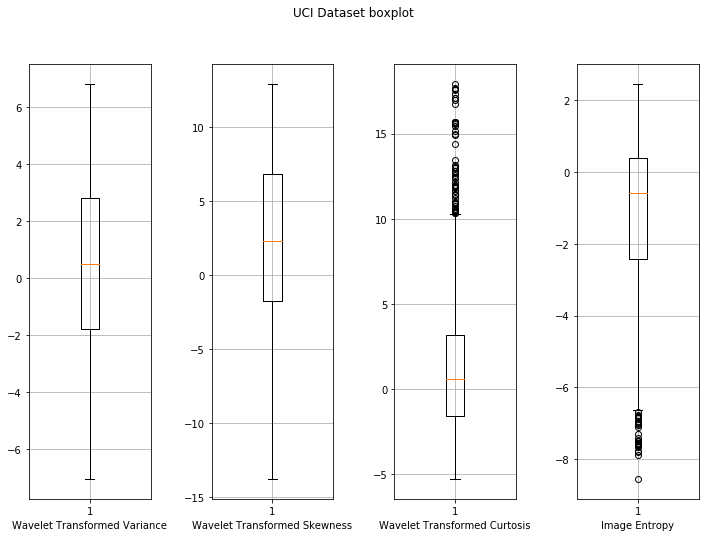

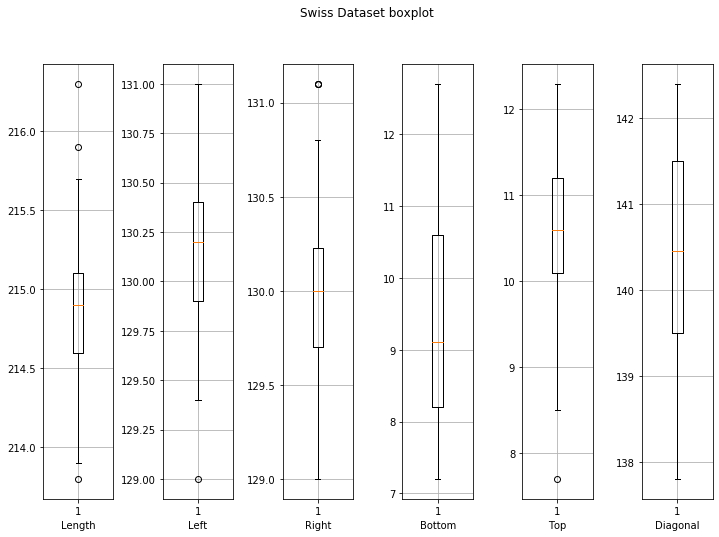

In [32]:
plt.figure(figsize = (12,8))
plt.subplot(141)
plt.boxplot(uciData["wavelet_transformed_variance"])
plt.xlabel("Wavelet Transformed Variance")
plt.grid()
plt.subplot(142)
plt.boxplot(uciData["wavelet_transformed_skewness"])
plt.xlabel("Wavelet Transformed Skewness")
plt.grid()
plt.subplot(143)
plt.boxplot(uciData["wavelet_transformed_curtosis"])
plt.xlabel("Wavelet Transformed Curtosis")
plt.grid()
plt.subplot(144)
plt.boxplot(uciData["image_entropy"])
plt.xlabel("Image Entropy")
plt.grid()
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("UCI Dataset boxplot")
plt.show()
plt.close()

plt.figure(figsize = (12,8))
plt.subplot(161)
plt.boxplot(swissData["Length"])
plt.xlabel("Length")
plt.grid()
plt.subplot(162)
plt.boxplot(swissData["Left"])
plt.xlabel("Left")
plt.grid()
plt.subplot(163)
plt.boxplot(swissData["Right"])
plt.xlabel("Right")
plt.grid()
plt.subplot(164)
plt.boxplot(swissData["Bottom"])
plt.xlabel("Bottom")
plt.grid()
plt.subplot(165)
plt.boxplot(swissData["Top"])
plt.xlabel("Top")
plt.grid()
plt.subplot(166)
plt.boxplot(swissData["Diagonal"])
plt.xlabel("Diagonal")
plt.grid()
plt.subplots_adjust(wspace = 0.7)
plt.suptitle("Swiss Dataset boxplot")
plt.show()
plt.close()

Boxplot grouped by class:

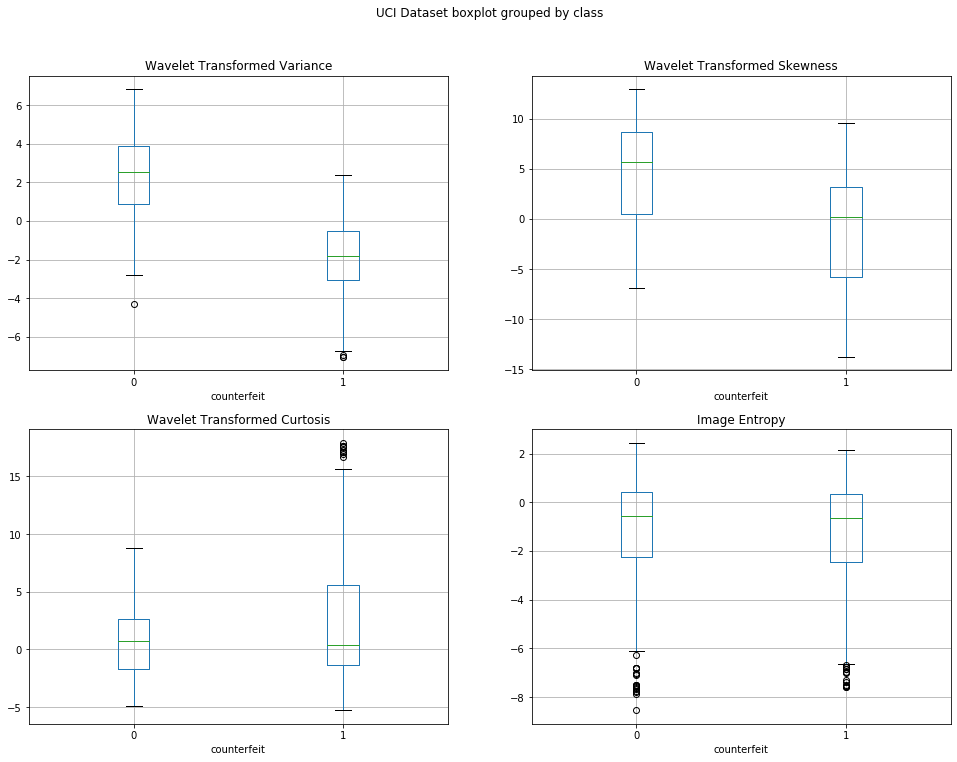

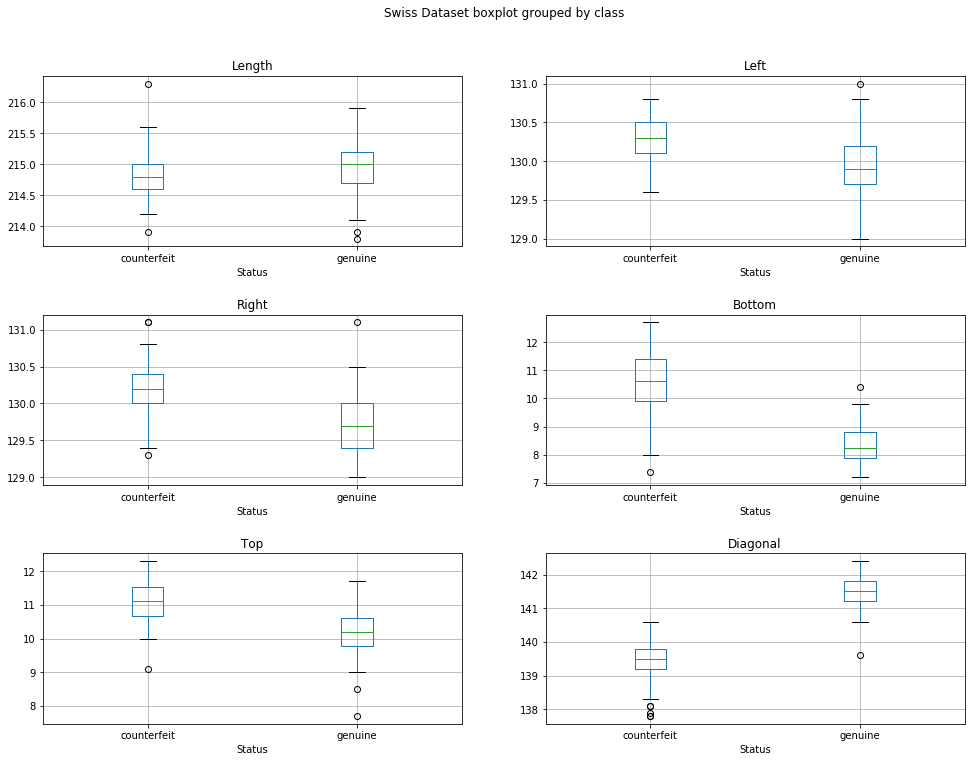

<function matplotlib.pyplot.close(fig=None)>

In [33]:
fig = plt.figure(figsize = (16,12))
ax = plt.subplot(221)
uciData.boxplot(by = "counterfeit", column = "wavelet_transformed_variance", ax = ax)
plt.title("Wavelet Transformed Variance")
ax = plt.subplot(222)
uciData.boxplot(by = "counterfeit", column = "wavelet_transformed_skewness", ax = ax)
plt.title("Wavelet Transformed Skewness")
ax = plt.subplot(223)
uciData.boxplot(by = "counterfeit", column = "wavelet_transformed_curtosis", ax = ax)
plt.title("Wavelet Transformed Curtosis")
ax = plt.subplot(224)
uciData.boxplot(by = "counterfeit", column = "image_entropy", ax = ax)
plt.title("Image Entropy")
plt.suptitle("UCI Dataset boxplot grouped by class")
plt.show()
plt.close()

fig = plt.figure(figsize = (16,12))
ax = plt.subplot(321)
swissData.boxplot(by = "Status", column = "Length", ax = ax)
ax = plt.subplot(322)
swissData.boxplot(by = "Status", column = "Left", ax = ax)
ax = plt.subplot(323)
swissData.boxplot(by = "Status", column = "Right", ax = ax)
ax = plt.subplot(324)
swissData.boxplot(by = "Status", column = "Bottom", ax = ax)
ax = plt.subplot(325)
swissData.boxplot(by = "Status", column = "Top", ax = ax)
ax = plt.subplot(326)
swissData.boxplot(by = "Status", column = "Diagonal", ax = ax)
plt.subplots_adjust(hspace = 0.4)
plt.suptitle("Swiss Dataset boxplot grouped by class")
plt.show()
plt.close

Boxplots grouped by class are more meaningful than others.  
From *UCI Dataset* boxplots it comes to light that the variance is very different between two classes and so it will have important weight in next classification steps (skewness also is similar to variance); instead, other variables have similar distribution of data for both classes and outliers that lack to variance and skewness.  
*Swiss Dataset* tells that left, right, bottom, top and diagonal have different distribution of data for the two classes; while, length will be the "lighest" variable in the next classification steps.

#### 1.8 - Shape Measure: Skewness and Kurtosis

The density function of all variables of our dataset are plotted again but in order to analyze their skewness and kurtosis.

About skewness[4]:
- *negative skewness* the mass of the distribution is concentrated on the right of the figure. The distribution is said to be *left-skewed*, *left-tailed*, or *skewed to the left*;
- *positive skewness* the mass of the distribution is concentrated on the left of the figure. The distribution is said to be *right-skewed*, *right-tailed*, or *skewed to the right*.

About kurtosis[5]:
- *leptokurtic* if it is greater than zero;
- *mesokurtic* if it is equal to zero;
- *platykurtic* if it is less than zero.

In [34]:
print("Skewness of UCI Dataset\n", uciData.skew())
print("Kurtosis of UCI Dataset\n", uciData.kurtosis())
print()
print("Skewness of Swiss Dataset\n", swissData.skew())
print("Kurtosis of Swiss Dataset\n", swissData.kurtosis())

Skewness of UCI Dataset
 wavelet_transformed_variance   -0.149388
wavelet_transformed_skewness   -0.394103
wavelet_transformed_curtosis    1.088569
image_entropy                  -1.022243
counterfeit                     0.223191
dtype: float64
Kurtosis of UCI Dataset
 wavelet_transformed_variance   -0.751581
wavelet_transformed_skewness   -0.437212
wavelet_transformed_curtosis    1.270476
image_entropy                   0.497496
counterfeit                    -1.953035
dtype: float64

Skewness of Swiss Dataset
 Length      0.190573
Left       -0.190277
Right       0.039208
Bottom      0.374771
Top        -0.230029
Diagonal   -0.192810
dtype: float64
Kurtosis of Swiss Dataset
 Length      0.799767
Left       -0.548892
Right      -0.131284
Bottom     -1.030122
Top         0.217075
Diagonal   -1.126876
dtype: float64


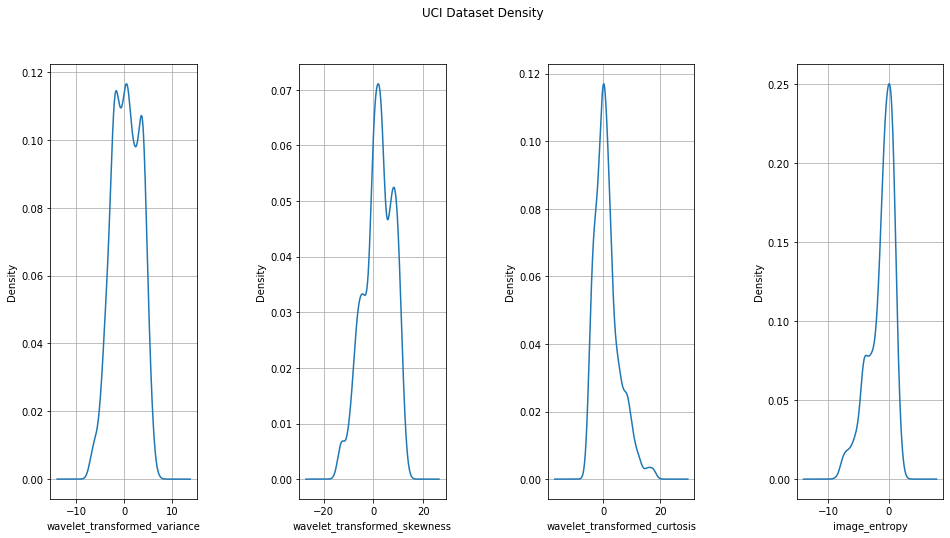

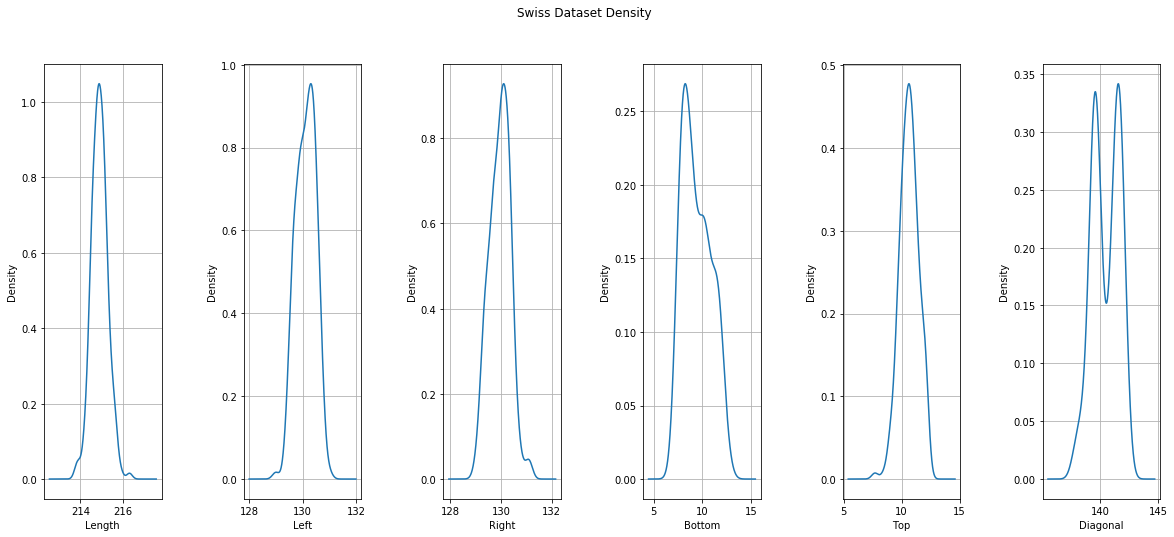

In [35]:
plt.figure(figsize = (16,8))
ax = plt.subplot(141)
uciData['wavelet_transformed_variance'].plot.density(ax = ax)
plt.xlabel("wavelet_transformed_variance")
plt.grid()
ax = plt.subplot(142)
uciData['wavelet_transformed_skewness'].plot.density(ax = ax)
plt.xlabel("wavelet_transformed_skewness")
plt.grid()
ax = plt.subplot(143)
uciData['wavelet_transformed_curtosis'].plot.density(ax = ax)
plt.xlabel("wavelet_transformed_curtosis")
plt.grid()
ax = plt.subplot(144)
uciData['image_entropy'].plot.density()
plt.xlabel("image_entropy")
plt.grid()
plt.subplots_adjust(wspace = 0.7)
plt.suptitle("UCI Dataset Density")
plt.show()
plt.close()

plt.figure(figsize = (20,8))
ax = plt.subplot(161)
swissData['Length'].plot.density(ax = ax)
plt.xlabel("Length")
plt.grid()
ax = plt.subplot(162)
swissData['Left'].plot.density(ax = ax)
plt.xlabel("Left")
plt.grid()
ax = plt.subplot(163)
swissData['Right'].plot.density(ax = ax)
plt.xlabel("Right")
plt.grid()
ax = plt.subplot(164)
swissData['Bottom'].plot.density()
plt.xlabel("Bottom")
plt.grid()
ax = plt.subplot(165)
swissData['Top'].plot.density()
plt.xlabel("Top")
plt.grid()
ax = plt.subplot(166)
swissData['Diagonal'].plot.density()
plt.xlabel("Diagonal")
plt.grid()
plt.subplots_adjust(wspace = 0.7)
plt.suptitle("Swiss Dataset Density")
plt.show()
plt.close()

#### 1.9 - Scatterplot

It will find the relation between each two features and the Banknote Class.

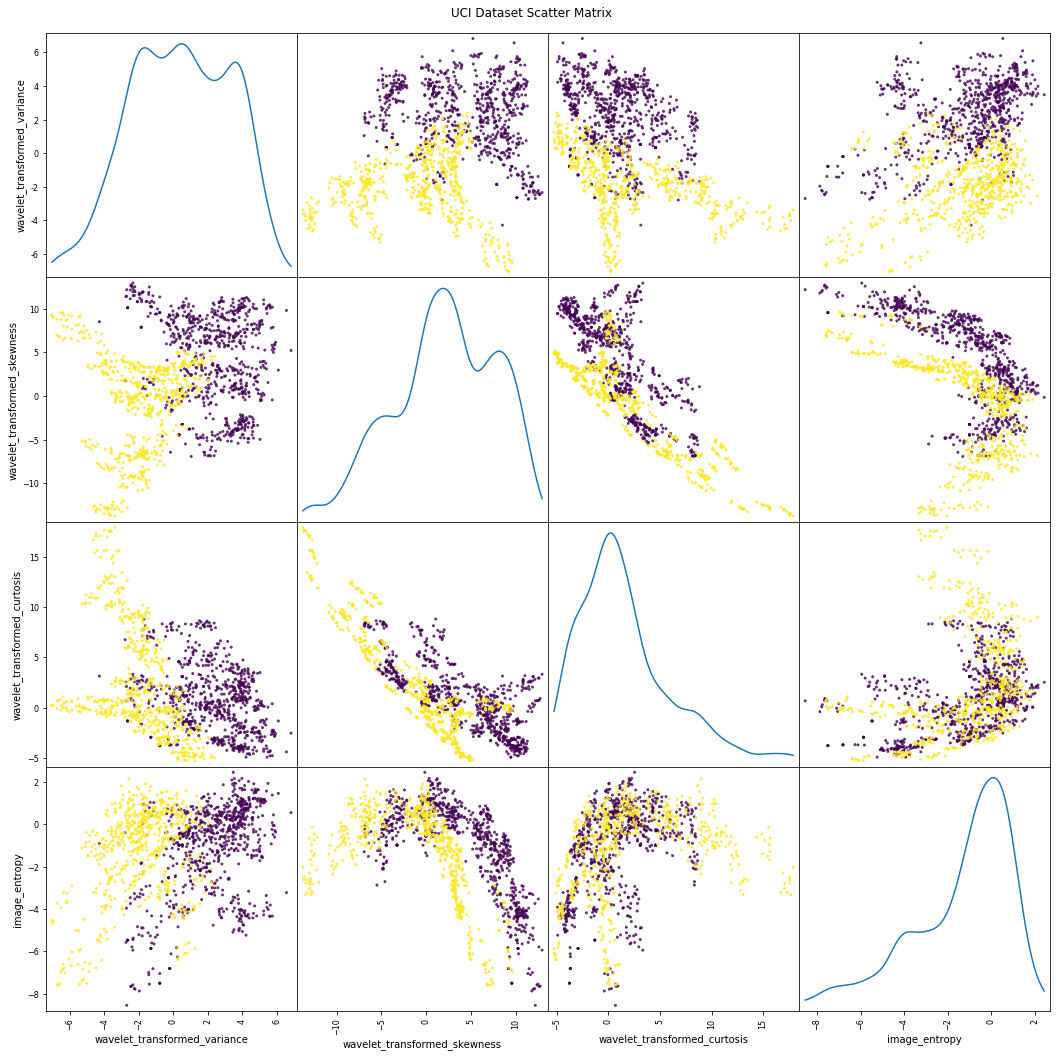

In [36]:
pd.plotting.scatter_matrix(uciDataX, c = uciDataY, figsize = (18,18), diagonal = "kde", alpha = .8)
plt.suptitle("UCI Dataset Scatter Matrix", y = .9)
plt.show()
plt.close()

The scatter matrix of *UCI Dataset* tells that:
- variance and skewness allow to separate most of genuine and counterfeit banknotes with simple curve;
- variance and curtosis allow to separate most of genuine and counterfeit banknotes with slop line;
- variance and entropy allow to separate most of genuine and counterfeit banknotes with slop line;
- skewness and curtosis make hard the separation of two classes;
- skewness and entropy make hard the separation of two classes;
- entropy and curtosis make very hard the separation of two classes.

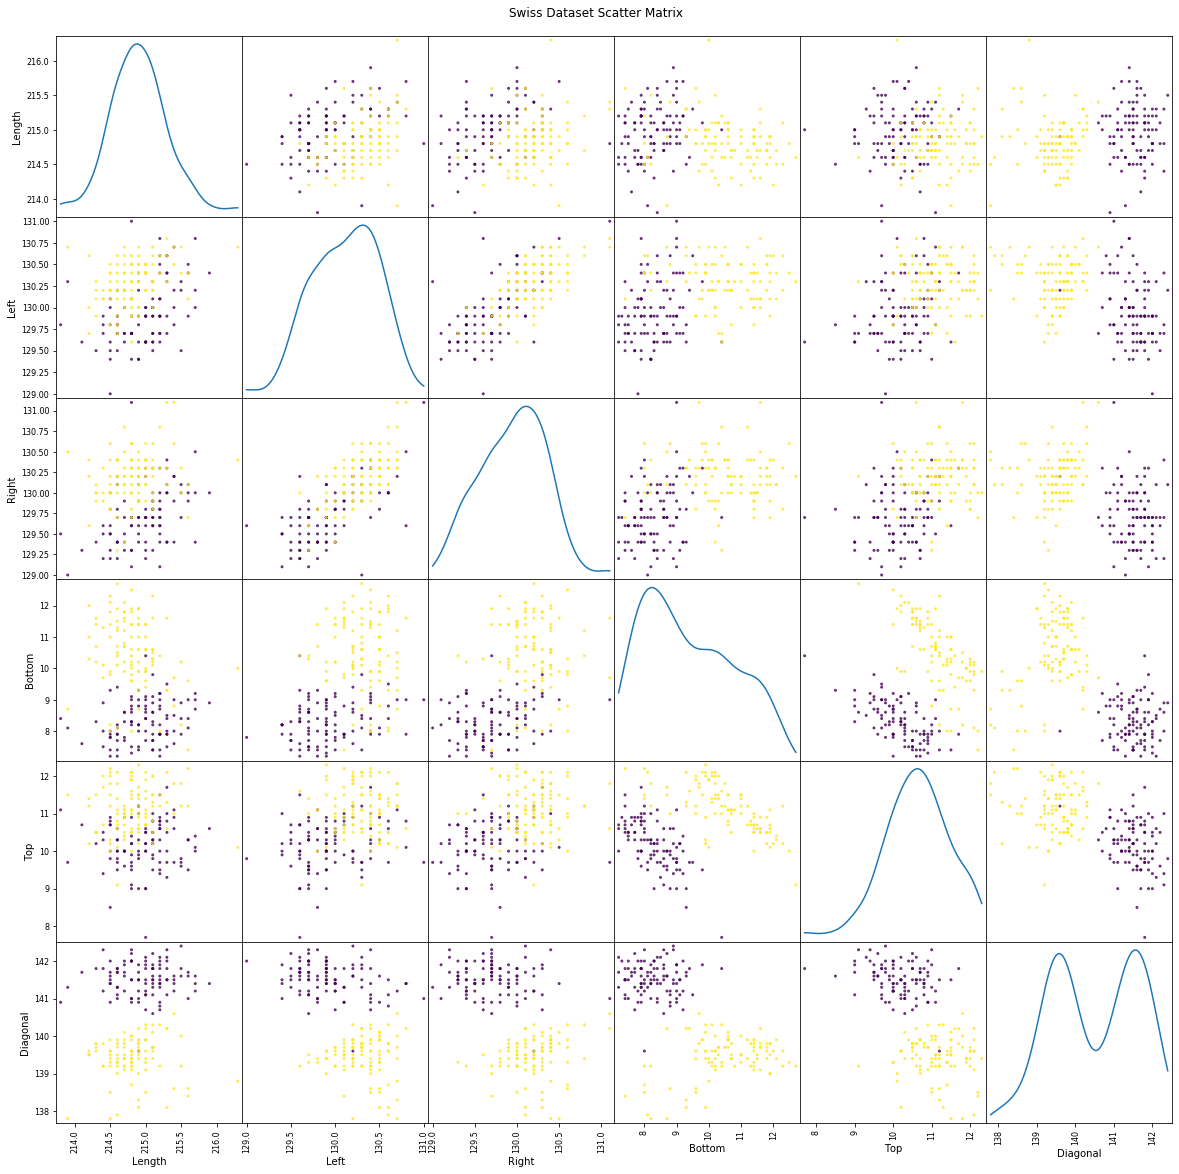

In [37]:
pd.plotting.scatter_matrix(swissDataX, c = swissDataY, figsize = (20,20), diagonal = "kde", alpha = .8)
plt.suptitle("Swiss Dataset Scatter Matrix", y = .9)
plt.show()
plt.close()

The scatter matrix of *Swiss Dataset* tells that:
- length and right/bottom/diagonal allow to separate most of genuine and counterfeit banknotes with slope line;
- length and left/top make little hard the data separation of two classes;
- left and right/diagonal allow to separate most of genuine and counterfeit banknotes with slope line;
- left and bottom/top make hard the data separation of two classes;
- right and bottom/diagonal allow to separate most of genuine and counterfeit banknotes with slope line;
- right and top make hard the data separation of two classes;
- bottom and top/diagonal allow to separate most of genuine and counterfeit banknotes with slope line;
- top and diagonal allow to separate most of genuine and counterfeit banknotes with slope line.

#### 1.10 - Q-Q Plot

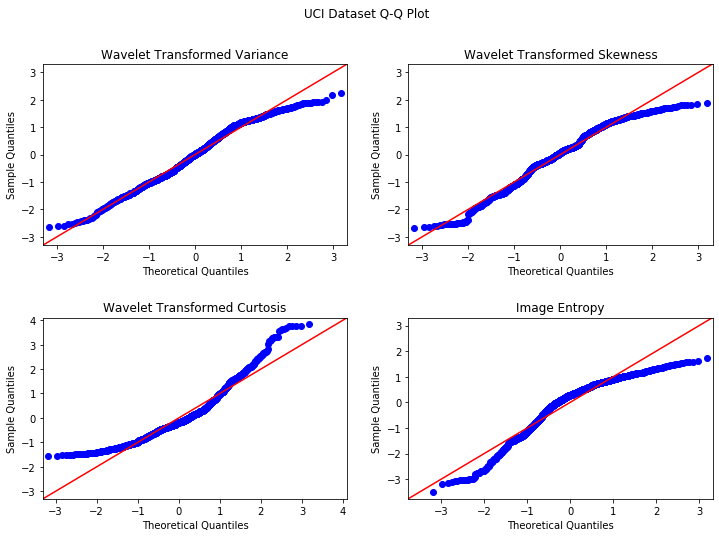

In [38]:
plt.figure(figsize = (12,8))
ax = plt.subplot(221)
qqplot(uciData['wavelet_transformed_variance'], fit=True, line='45', ax = ax)
plt.title("Wavelet Transformed Variance")
ax = plt.subplot(222)
qqplot(uciData['wavelet_transformed_skewness'], fit=True, line='45', ax = ax)
plt.title("Wavelet Transformed Skewness")
ax = plt.subplot(223)
qqplot(uciData['wavelet_transformed_curtosis'], fit=True, line='45', ax = ax)
plt.title("Wavelet Transformed Curtosis")
ax = plt.subplot(224)
qqplot(uciData['image_entropy'], fit=True, line='45', ax = ax)
plt.title("Image Entropy")
plt.suptitle("UCI Dataset Q-Q Plot")
plt.subplots_adjust(hspace = .4)
plt.show()
plt.close()

As shown in paragraph 1.8, variance and skewness are the nearest variables to Gaussian Distribution.

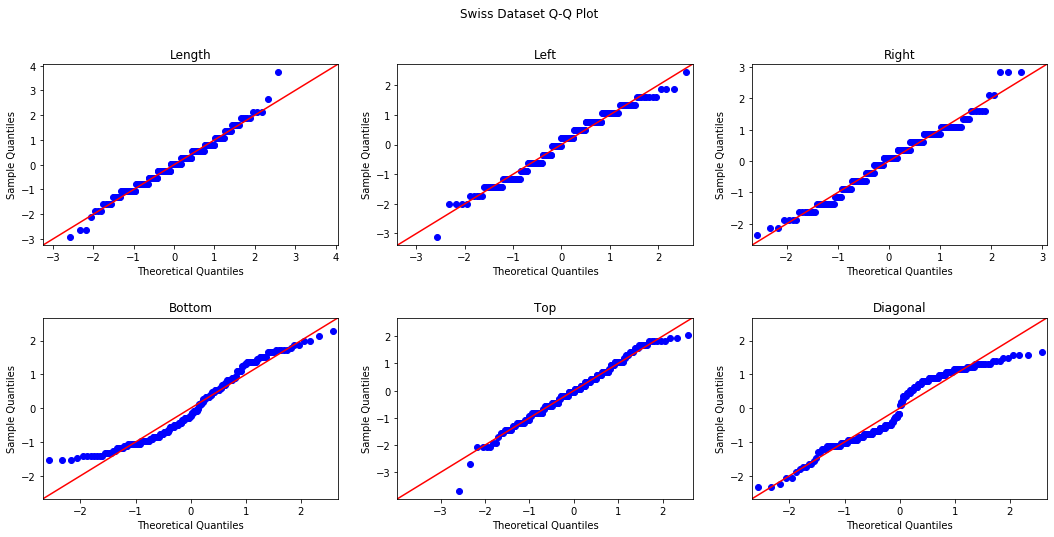

In [39]:
plt.figure(figsize = (18,8))
ax = plt.subplot(231)
qqplot(swissData['Length'], fit=True, line='45', ax = ax)
plt.title("Length")
ax = plt.subplot(232)
qqplot(swissData['Left'], fit=True, line='45', ax = ax)
plt.title("Left")
ax = plt.subplot(233)
qqplot(swissData['Right'], fit=True, line='45', ax = ax)
plt.title("Right")
ax = plt.subplot(234)
qqplot(swissData['Bottom'], fit=True, line='45', ax = ax)
plt.title("Bottom")
ax = plt.subplot(235)
qqplot(swissData['Top'], fit=True, line='45', ax = ax)
plt.title("Top")
ax = plt.subplot(236)
qqplot(swissData['Diagonal'], fit=True, line='45', ax = ax)
plt.title("Diagonal")
plt.suptitle("Swiss Dataset Q-Q Plot")
plt.subplots_adjust(hspace = .4)
plt.show()
plt.close()

As shown in paragraph 1.8, length, left, right and top are the nearest variables to Gaussian Distribution.

### 2 - Features Correlation

In this section, it will check correlations between features and check whether there any feature combination that can help identifying Banknote Class.

The valuation of Pearson Index, Spearman Index and Kendall Index are based on following consideration.  
The p-value threshold is $0.05$ and so all obtained p-values less than this threshold are relevant statistically.  
The sign of the index can be:
- positive: the variables are correlated;
- negative: the variables are anti-correlated.  

The absolute values $|\rho|$ of the index suggests:
- strong correlation (or anti-correlation) if $0.7 < |\rho| \leq 1$;
- moderate correlation (or anti-correaltion) if $0.5 < |\rho| \leq 0.7$;
- weak correlation (or anti-correlation) if if $0.3 < |\rho| \leq 0.5$;
- no-correlation for other values.

#### 2.1 - Covariance Matrix

In [40]:
uciDataX = uciDataX.rename(columns = {"wavelet_transformed_variance": "w. t. variance", "wavelet_transformed_skewness": "w. t. skewness", "wavelet_transformed_curtosis": "w. t. curtosis"})
print(uciDataX.cov())

                w. t. variance  w. t. skewness  w. t. curtosis  image_entropy
w. t. variance        8.081299        4.405083       -4.666323       1.653338
w. t. skewness        4.405083       34.445710      -19.905119      -6.490033
w. t. curtosis       -4.666323      -19.905119       18.576359       2.887241
image_entropy         1.653338       -6.490033        2.887241       4.414256


About *UCI Dataset* it comes to light that:
- variance and skewness/image entropy are positive correlated;
- curtosis and image entropy are positive correlated;
- skewness and curtosis/image entropy are negative correlated;
- curtosis and variance are negative correlated.

In [41]:
print(swissData.cov())

            Length      Left     Right    Bottom       Top  Diagonal
Length    0.141793  0.031443  0.023091 -0.103246 -0.018541  0.084306
Left      0.031443  0.130339  0.108427  0.215803  0.105039 -0.209342
Right     0.023091  0.108427  0.163274  0.284132  0.129997 -0.240470
Bottom   -0.103246  0.215803  0.284132  2.086878  0.164539 -1.036996
Top      -0.018541  0.105039  0.129997  0.164539  0.644723 -0.549615
Diagonal  0.084306 -0.209342 -0.240470 -1.036996 -0.549615  1.327716


About *Swiss Dataset* it comes to light that:
- length and left/right/diagonal are positive correlated;
- length and bottom/top are negative correlated;
- left and right/bottom/top are positive correlated;
- left and diagonal are negative correlated;
- right and bottom/top are positive correlated;
- right and diagonal are negative correlated;
- bottom and top are positive correlated;
- bottom and diagonal are negative correlated;
- top and diagonal are negative correlated.

The covariance lacks of correlation measure namely doesn't allow to know if a correlation is strong, moderate or weak. Next indeces resolve this.

#### 2.2 - Pearson Index

In [42]:
print("UCI Dataset")
print("variance and skewness: ", pearsonr(uciData["wavelet_transformed_variance"], uciData["wavelet_transformed_skewness"]))
print("variance and curtosis", pearsonr(uciData["wavelet_transformed_variance"], uciData["wavelet_transformed_curtosis"]))
print("variance and image entropy", pearsonr(uciData["wavelet_transformed_variance"], uciData["image_entropy"]))
print("skewness and curtosis", pearsonr(uciData["wavelet_transformed_skewness"], uciData["wavelet_transformed_curtosis"]))
print("skewness and image entropy", pearsonr(uciData["wavelet_transformed_skewness"], uciData["image_entropy"]))
print("curtosis and image entropy", pearsonr(uciData["wavelet_transformed_curtosis"], uciData["image_entropy"]))

UCI Dataset
variance and skewness:  (0.26402552995746065, 2.5790864863608388e-23)
variance and curtosis (-0.38084997192225906, 1.3534405673159523e-48)
variance and image entropy (0.27681669611762183, 1.4817699125571435e-25)
skewness and curtosis (-0.7868952243438816, 1.627775218389333e-289)
skewness and image entropy (-0.5263208424338817, 1.3048281261613001e-98)
curtosis and image entropy (0.3188408878882565, 8.594882741255598e-34)


All Pearson index of *UCI Dataset* are relevant statistically.
There is no-correlation between:
- variance and skewness;
- variance and image entropy.

There is weak correlation between curtosis and image entropy.

There is weak anti-correlation between:
- variance and curtosis;
- skewness and image entropy.

There is strong anti-correlation between skewness and curtosis.

In [43]:
print("Swiss Dataset")
print("length and left", pearsonr(swissData["Length"], swissData["Left"]))
print("length and right", pearsonr(swissData["Length"], swissData["Right"]))
print("length and bottom", pearsonr(swissData["Length"], swissData["Bottom"]))
print("length and top", pearsonr(swissData["Length"], swissData["Top"]))
print("length and diagonal", pearsonr(swissData["Length"], swissData["Diagonal"]))
print("left and right", pearsonr(swissData["Left"], swissData["Right"]))
print("left and bottom", pearsonr(swissData["Left"], swissData["Bottom"]))
print("left and top", pearsonr(swissData["Left"], swissData["Top"]))
print("left and diagonal", pearsonr(swissData["Left"], swissData["Diagonal"]))
print("right and bottom", pearsonr(swissData["Right"], swissData["Bottom"]))
print("right and top", pearsonr(swissData["Right"], swissData["Top"]))
print("right and diagonal", pearsonr(swissData["Right"], swissData["Diagonal"]))
print("bottom and top", pearsonr(swissData["Bottom"], swissData["Top"]))
print("bottom and diagonal", pearsonr(swissData["Bottom"], swissData["Diagonal"]))
print("top and diagonal", pearsonr(swissData["Top"], swissData["Diagonal"]))

Swiss Dataset
length and left (0.23129256960234673, 0.0009832846546280216)
length and right (0.15176279747893778, 0.03193376269822599)
length and bottom (-0.18980092324096576, 0.007105068863924154)
length and top (-0.06132141420858679, 0.3883617575061661)
length and diagonal (0.19430145841590232, 0.005834537385951893)
left and right (0.7432627664138779, 2.062976271649489e-36)
left and bottom (0.41378097636023986, 1.1274691462997884e-09)
left and top (0.3623495988542751, 1.3453452641375331e-07)
left and diagonal (-0.5032290450535037, 3.090738850711766e-14)
right and bottom (0.48675765301862534, 2.708416195409413e-13)
right and top (0.40067021422084814, 4.128055402321008e-09)
right and diagonal (-0.516475541381144, 4.947234746888729e-15)
bottom and top (0.14185134474880473, 0.04510756004919318)
bottom and diagonal (-0.6229826966875114, 6.855922554641705e-23)
top and diagonal (-0.5940446430779998, 1.8291168429423775e-20)


All indeces are relevant statistically except for that between length and top.

There is no-correlation between:
- length and left;
- length and right;
- length and bottom;
- length and diagonal;
- bottom and top.

There is strong correlation between left and right.

There is weak correlation between:
- left and bottom;
- left and top;
- right and top;
- right and bottom.

There is moderate anti-correlation between:
- left and diagonal;
- right and diagonal;
- bottom and diagonal;
- top and diagonal.

#### 2.3 - Spearman Index

In [44]:
print("UCI Dataset")
print("variance and skewness: ", spearmanr(uciData["wavelet_transformed_variance"], uciData["wavelet_transformed_skewness"]))
print("variance and curtosis", spearmanr(uciData["wavelet_transformed_variance"], uciData["wavelet_transformed_curtosis"]))
print("variance and image entropy", spearmanr(uciData["wavelet_transformed_variance"], uciData["image_entropy"]))
print("skewness and curtosis", spearmanr(uciData["wavelet_transformed_skewness"], uciData["wavelet_transformed_curtosis"]))
print("skewness and image entropy", spearmanr(uciData["wavelet_transformed_skewness"], uciData["image_entropy"]))
print("curtosis and image entropy", spearmanr(uciData["wavelet_transformed_curtosis"], uciData["image_entropy"]))

UCI Dataset
variance and skewness:  SpearmanrResult(correlation=0.25512613304734, pvalue=7.940308060733847e-22)
variance and curtosis SpearmanrResult(correlation=-0.3267039038117922, pvalue=1.7302430693605613e-35)
variance and image entropy SpearmanrResult(correlation=0.24150329899637762, pvalue=1.1700031992887927e-19)
skewness and curtosis SpearmanrResult(correlation=-0.7294255373918972, pvalue=3.5439050866678084e-228)
skewness and image entropy SpearmanrResult(correlation=-0.572510418527861, pvalue=2.664592276803211e-120)
curtosis and image entropy SpearmanrResult(correlation=0.4332986944293554, pvalue=6.817630331600465e-64)


All Spearman index of *UCI Dataset* are relevant statistically.  
There is no-correlation between:
- variance and skewness;
- variance and image entropy.

There is weak anti-correlation between variance and curtosis.  
There is weak correlation between curtosis and image entropy.  
There is strong anti-correlation between skewness and curtosis.  
There is moderate anti-correlation skewness and image entropy.

In [45]:
print("Swiss Dataset")
print("length and left", spearmanr(swissData["Length"], swissData["Left"]))
print("length and right", spearmanr(swissData["Length"], swissData["Right"]))
print("length and bottom", spearmanr(swissData["Length"], swissData["Bottom"]))
print("length and top", spearmanr(swissData["Length"], swissData["Top"]))
print("length and diagonal", spearmanr(swissData["Length"], swissData["Diagonal"]))
print("left and right", spearmanr(swissData["Left"], swissData["Right"]))
print("left and bottom", spearmanr(swissData["Left"], swissData["Bottom"]))
print("left and top", spearmanr(swissData["Left"], swissData["Top"]))
print("left and diagonal", spearmanr(swissData["Left"], swissData["Diagonal"]))
print("right and bottom", spearmanr(swissData["Right"], swissData["Bottom"]))
print("right and top", spearmanr(swissData["Right"], swissData["Top"]))
print("right and diagonal", spearmanr(swissData["Right"], swissData["Diagonal"]))
print("bottom and top", spearmanr(swissData["Bottom"], swissData["Top"]))
print("bottom and diagonal", spearmanr(swissData["Bottom"], swissData["Diagonal"]))
print("top and diagonal", spearmanr(swissData["Top"], swissData["Diagonal"]))

Swiss Dataset
length and left SpearmanrResult(correlation=0.22559881551870092, pvalue=0.0013183254812342547)
length and right SpearmanrResult(correlation=0.10803261659899549, pvalue=0.1278349150321366)
length and bottom SpearmanrResult(correlation=-0.18961860503668881, pvalue=0.007161374905445991)
length and top SpearmanrResult(correlation=-0.05014283938377076, pvalue=0.4807320006176814)
length and diagonal SpearmanrResult(correlation=0.22877862477401775, pvalue=0.0011201737826231752)
left and right SpearmanrResult(correlation=0.7506280405325582, pvalue=1.7381049826376187e-37)
left and bottom SpearmanrResult(correlation=0.4272073462394468, pvalue=2.812859288958653e-10)
left and top SpearmanrResult(correlation=0.369656164839904, pvalue=7.164643131854845e-08)
left and diagonal SpearmanrResult(correlation=-0.4855162639590804, pvalue=3.174929465246269e-13)
right and bottom SpearmanrResult(correlation=0.5200941852492594, pvalue=2.9575276663790663e-15)
right and top SpearmanrResult(correlati

The following indeces are not relevant statistically:
- length and right;
- lenght and top.

There is strong correlation between left and right.  
There is weak correlation between:
- left and bottom;
- left and top;
- right and top;

There is weak anti-correlation between left and diagonal.  
There is moderate correlation between right and bottom.  
There is moderate anti-correlation between:
- right and diagonal;
- bottom and diagonal;
- top and diagonal.  

There is no-correlation between:
- length and left;
- length and bottom;
- length and diagonal;
- bottom and top.

#### 2.4 - Kendall Index

In [46]:
print("UCI Dataset")
print("variance and skewness: ", kendalltau(uciData["wavelet_transformed_variance"], uciData["wavelet_transformed_skewness"]))
print("variance and curtosis", kendalltau(uciData["wavelet_transformed_variance"], uciData["wavelet_transformed_curtosis"]))
print("variance and image entropy", kendalltau(uciData["wavelet_transformed_variance"], uciData["image_entropy"]))
print("skewness and curtosis", kendalltau(uciData["wavelet_transformed_skewness"], uciData["wavelet_transformed_curtosis"]))
print("skewness and image entropy", kendalltau(uciData["wavelet_transformed_skewness"], uciData["image_entropy"]))
print("curtosis and image entropy", kendalltau(uciData["wavelet_transformed_curtosis"], uciData["image_entropy"]))

UCI Dataset
variance and skewness:  KendalltauResult(correlation=0.18055421918610118, pvalue=1.2720784640615347e-23)
variance and curtosis KendalltauResult(correlation=-0.22645475996517603, pvalue=3.299764406520118e-36)
variance and image entropy KendalltauResult(correlation=0.16735409538613258, pvalue=1.619204142965763e-20)
skewness and curtosis KendalltauResult(correlation=-0.5524511480070493, pvalue=2.566833123691207e-206)
skewness and image entropy KendalltauResult(correlation=-0.390602301859174, pvalue=3.967395430852926e-104)
curtosis and image entropy KendalltauResult(correlation=0.2836363837924914, pvalue=8.625081450863432e-56)


All Kendall index of *UCI Dataset* are relevant statistically.  
There is no-correlation between:
- variance and skewness;
- variance and curtosis;
- variance and image entropy;
- curtosis and image entropy.

There is moderate anti-correlation between skewness and curtosis.  
There is weak anti-correlation between skewness and image entropy.

In [47]:
print("Swiss Dataset")
print("length and left", kendalltau(swissData["Length"], swissData["Left"]))
print("length and right", kendalltau(swissData["Length"], swissData["Right"]))
print("length and bottom", kendalltau(swissData["Length"], swissData["Bottom"]))
print("length and top", kendalltau(swissData["Length"], swissData["Top"]))
print("length and diagonal", kendalltau(swissData["Length"], swissData["Diagonal"]))
print("left and right", kendalltau(swissData["Left"], swissData["Right"]))
print("left and bottom", kendalltau(swissData["Left"], swissData["Bottom"]))
print("left and top", kendalltau(swissData["Left"], swissData["Top"]))
print("left and diagonal", kendalltau(swissData["Left"], swissData["Diagonal"]))
print("right and bottom", kendalltau(swissData["Right"], swissData["Bottom"]))
print("right and top", kendalltau(swissData["Right"], swissData["Top"]))
print("right and diagonal", kendalltau(swissData["Right"], swissData["Diagonal"]))
print("bottom and top", kendalltau(swissData["Bottom"], swissData["Top"]))
print("bottom and diagonal", kendalltau(swissData["Bottom"], swissData["Diagonal"]))
print("top and diagonal", kendalltau(swissData["Top"], swissData["Diagonal"]))

Swiss Dataset
length and left KendalltauResult(correlation=0.16259103807935574, pvalue=0.0014405708099358202)
length and right KendalltauResult(correlation=0.07841583462070326, pvalue=0.12345272703619883)
length and bottom KendalltauResult(correlation=-0.1387030260983598, pvalue=0.005327807885706285)
length and top KendalltauResult(correlation=-0.03355866733452849, pvalue=0.5033548516621824)
length and diagonal KendalltauResult(correlation=0.17094313594041666, pvalue=0.0006276692625157961)
left and right KendalltauResult(correlation=0.5918445205050125, pvalue=2.965763669417389e-31)
left and bottom KendalltauResult(correlation=0.2940810578376159, pvalue=3.445120988027529e-09)
left and top KendalltauResult(correlation=0.26462553076995476, pvalue=1.307140736052183e-07)
left and diagonal KendalltauResult(correlation=-0.33728022620107384, pvalue=1.5037866170248197e-11)
right and bottom KendalltauResult(correlation=0.3566851250426577, pvalue=6.777006901748348e-13)
right and top KendalltauRes

The following indeces are not relevant statistically:
- length and right;
- length and top;
- bottom and top.

There is moderate correlation between left and right.  
There is weak anti-correalation between:
- left and diagonal;
- right and diagonal;
- bottom and diagonal;
- top and diagonal. 

There is weak correlation between:
- right and bottom;
- right and top. 

There is no-correlation between:
- length and left;
- length and bottom;
- length and diagonal;
- left and bottom;
- left and top.

### 3 - Principal Component Analysis (PCA)

PCA on *UCI Dataset* without normalization:

In [48]:
uciPca = PCA()
uciPca.fit(uciDataX)
uciTransform = uciPca.transform(uciDataX)

PCA on *UCI Dataset* with normalization in $[0,1]$:

In [49]:
minMaxScaler = preprocessing.MinMaxScaler()
uciDataXNorm01 = minMaxScaler.fit_transform(uciDataX)
uciDataXNorm01 = pd.DataFrame(uciDataXNorm01)
#print(uciDataXNorm01.head())
uciPcaNorm = PCA()
uciPcaNorm.fit(uciDataXNorm01)
uciTransformNorm = uciPcaNorm.transform(uciDataXNorm01)

What is the correct number of components of *UCI Dataset* needed to describe the data? [6]

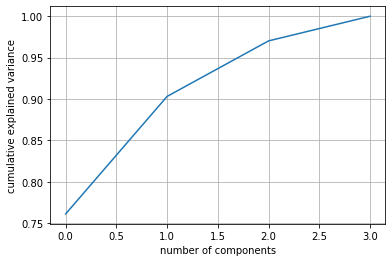

In [50]:
plt.plot(np.cumsum(uciPca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.grid()
plt.show()
plt.close()

The first 2 components contains approximately 97% of the variance and 3 components describe close to $100\%$ of the variance.

(1372, 4)
(1372, 4)


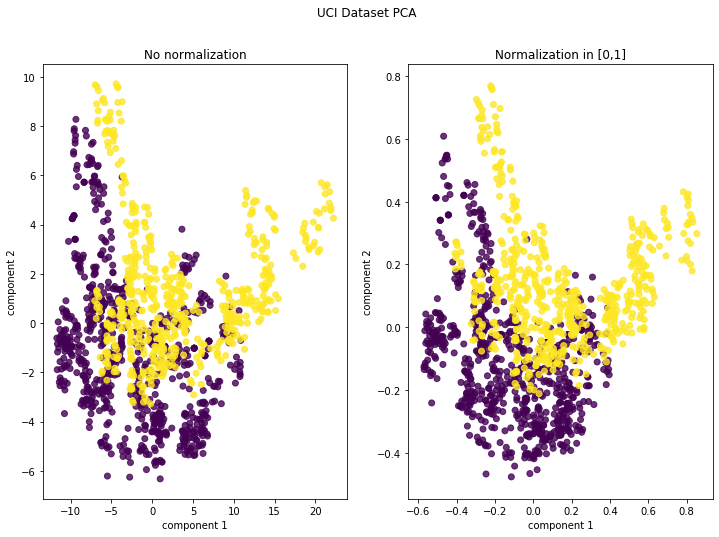

In [51]:
print(uciTransform.shape)
print(uciTransformNorm.shape)
plt.figure(figsize = (12,8))
ax = plt.subplot(121)
plt.scatter(uciTransform[:,0], uciTransform[:,1], c = uciDataY, alpha = .8)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("No normalization")
plt.subplot(122)
plt.scatter(uciTransformNorm[:,0], uciTransformNorm[:,1], c = uciDataY, alpha = .8)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("Normalization in [0,1]")
plt.suptitle("UCI Dataset PCA")
plt.show()

The normalization is strongly suggested for PCA. Because of weak separability of these data, variables without PCA will be used in classification tasks.

PCA on *Swiss Dataset* without normalization:

In [52]:
swissPca = PCA()
swissPca.fit(swissDataX)
swissTransform = swissPca.transform(swissDataX)

PCA on *Swiss Dataset* with normalization in $[0,1]$:

In [53]:
swissDataXNorm01 = minMaxScaler.fit_transform(swissDataX)
swissDataXNorm01 = pd.DataFrame(swissDataXNorm01)
#print(swissDataXNorm01.head())
swissPcaNorm = PCA()
swissPcaNorm.fit(swissDataXNorm01)
swissTransformNorm = swissPcaNorm.transform(swissDataXNorm01)

What is the correct number of components of *Swiss Dataset* needed to describe the data?

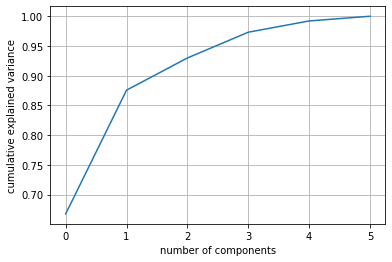

In [54]:
plt.plot(np.cumsum(swissPca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.grid()
plt.show()
plt.close()

The first 2 components contains approximately $93\%$ of the variance and 5 components describe close to 100% of the variance.

(200, 6)
(200, 6)


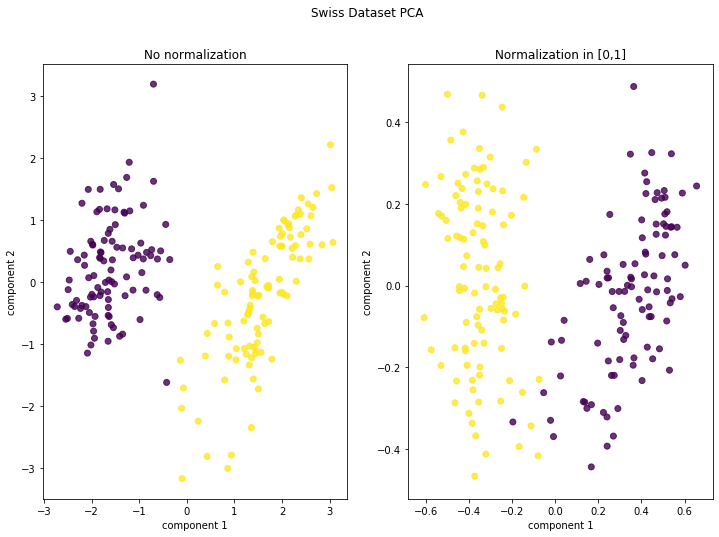

In [55]:
print(swissTransform.shape)
print(swissTransformNorm.shape)
plt.figure(figsize = (12,8))
ax = plt.subplot(121)
plt.scatter(swissTransform[:,0], swissTransform[:,1], c = swissDataY, alpha = .8)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("No normalization")
ax = plt.subplot(122)
plt.scatter(swissTransformNorm[:,0], swissTransformNorm[:,1], c = swissDataY, alpha = .8)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("Normalization in [0,1]")
plt.suptitle("Swiss Dataset PCA")
plt.show()
plt.close()

The normalization for PCA can be facultative. These PCA data will be used in classification tasks.

### 4 - Machine Learning Algorithms

For all classification techniques both datasets will be splitted in training set ( $70\%$ ) and testing set ( $30\%$ ).  
Five algorithms will be compared:
- Naive Bayes;
- Logistic Regression;
- Decision Trees;
- Random Forest;
- SVM.  

#### 4.2 - Swiss Dataset

In [56]:
swissData.replace(to_replace = "genuine", value = 0, inplace = True)
swissData.replace(to_replace = "counterfeit", value = 1, inplace = True)
swissDataTrain, swissDataTest = train_test_split(swissData, test_size = 0.30)
swissDataTestGT = swissDataTest["Status"]

##### 4.2.1 - Naive Bayes

In [57]:
model = GaussianNB(priors=[0.5,0.5])
model.fit(swissDataTrain[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']], swissDataTrain['Status'])
testPred = model.predict(swissDataTest[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']])

In [58]:
tn, fp, fn, tp = confusion_matrix(swissDataTestGT, testPred).ravel()
print("Swiss Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(swissDataTestGT, testPred)
recall = recall_score(swissDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(swissDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(swissDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

Swiss Dataset:
	#True Negative: 31
	#False Positive: 0
	#False Negative: 0
	#True Positive: 29
	Precision: 1.000
	Recall: 1.000
	F1 score: 1.000
	Accuracy: 1.000


##### 4.2.2 - Logistic Regression

In [59]:
model = LogisticRegression()
model.fit(swissDataTrain[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']], swissDataTrain['Status'])
testPred = model.predict(swissDataTest[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']])

In [60]:
tn, fp, fn, tp = confusion_matrix(swissDataTestGT, testPred).ravel()
print("Swiss Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(swissDataTestGT, testPred)
recall = recall_score(swissDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(swissDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(swissDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

Swiss Dataset:
	#True Negative: 31
	#False Positive: 0
	#False Negative: 0
	#True Positive: 29
	Precision: 1.000
	Recall: 1.000
	F1 score: 1.000
	Accuracy: 1.000


##### 4.2.3 - Decision Trees

In [61]:
model = DecisionTreeClassifier()
model.fit(swissDataTrain[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']], swissDataTrain['Status'])
testPred = model.predict(swissDataTest[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']])

In [62]:
tn, fp, fn, tp = confusion_matrix(swissDataTestGT, testPred).ravel()
print("Swiss Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(swissDataTestGT, testPred)
recall = recall_score(swissDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(swissDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(swissDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

Swiss Dataset:
	#True Negative: 31
	#False Positive: 0
	#False Negative: 0
	#True Positive: 29
	Precision: 1.000
	Recall: 1.000
	F1 score: 1.000
	Accuracy: 1.000


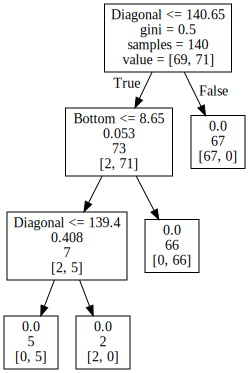

In [63]:
dotData = tree.export_graphviz(model, out_file=None, feature_names=['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal'], label='root') 
graph = graphviz.Source(dotData)
graph

##### 4.2.4 - Random Forest

In [64]:
model = RandomForestClassifier(max_depth=3, n_estimators=100)
model.fit(swissDataTrain[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']], swissDataTrain['Status'])
testPred = model.predict(swissDataTest[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']])

In [65]:
tn, fp, fn, tp = confusion_matrix(swissDataTestGT, testPred).ravel()
print("Swiss Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(swissDataTestGT, testPred)
recall = recall_score(swissDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(swissDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(swissDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

Swiss Dataset:
	#True Negative: 31
	#False Positive: 0
	#False Negative: 0
	#True Positive: 29
	Precision: 1.000
	Recall: 1.000
	F1 score: 1.000
	Accuracy: 1.000


##### 4.2.5 - SVM

In [66]:
model = SVC(kernel='linear',C=100)
model.fit(swissDataTrain[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']], swissDataTrain['Status'])
testPred = model.predict(swissDataTest[['Length','Left', 'Right', 'Bottom', 'Top', 'Diagonal']])

In [67]:
tn, fp, fn, tp = confusion_matrix(swissDataTestGT, testPred).ravel()
print("Swiss Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(swissDataTestGT, testPred)
recall = recall_score(swissDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(swissDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(swissDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

Swiss Dataset:
	#True Negative: 30
	#False Positive: 1
	#False Negative: 0
	#True Positive: 29
	Precision: 0.967
	Recall: 1.000
	F1 score: 0.983
	Accuracy: 0.983


#### 4.2 - UCI Dataset

This dataset is used by Kumar et al.[7] and Upadhyaya et al.[8] to perform their analysis with the same goal. All results will be compared. Moreover, the results of this work have got variability in accord to the choice of seed for the random split of dataset.

In [58]:
np.random.seed(1357)
#uciDataTrain, uciDataTest = train_test_split(uciData, test_size = 0.30)
uciDataTestGT = uciDataTest["counterfeit"]
#minMaxScaler = preprocessing.MinMaxScaler()
#uciDataTrainNorm01 = minMaxScaler.fit_transform(uciDataTrain)
#uciDataTrainNorm01 = pd.DataFrame(uciDataTrainNorm01)
#uciDataTestNorm01 = minMaxScaler.fit_transform(uciDataTest)
#uciDataTestNorm01 = pd.DataFrame(uciDataTestNorm01)
uciDataNorm01 = pd.DataFrame({"wavelet_transformed_variance":uciDataVarianceNorm01, "wavelet_transformed_skewness":uciDataSkewnessNorm01, "wavelet_transformed_curtosis":uciDataCurtosisNorm01, "image_entropy":uciDataEntropyNorm01, "counterfeit":uciData["counterfeit"]})
uciDataTrainNorm01, uciDataTestNorm01 = train_test_split(uciDataNorm01, test_size = 0.30)

It is used the same splitting percentage of Kumar et al.[8] to perform the next comparison.

##### 4.2.1 - Naive Bayes

In [59]:
model = GaussianNB(priors=[0.5,0.5])
model.fit(uciDataTrainNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']], uciDataTrainNorm01['counterfeit'])
testPred = model.predict(uciDataTestNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']])

In [60]:
tn, fp, fn, tp = confusion_matrix(uciDataTestGT, testPred).ravel()
print("UCI Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(uciDataTestGT, testPred)
recall = recall_score(uciDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(uciDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(uciDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

UCI Dataset:
	#True Negative: 134
	#False Positive: 102
	#False Negative: 98
	#True Positive: 78
	Precision: 0.433
	Recall: 0.443
	F1 score: 0.438
	Accuracy: 0.515


##### 4.2.2 - Logistic Regression

In [61]:
model = LogisticRegression()
model.fit(uciDataTrainNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']], uciDataTrainNorm01['counterfeit'])
testPred = model.predict(uciDataTestNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']])

In [62]:
tn, fp, fn, tp = confusion_matrix(uciDataTestGT, testPred).ravel()
print("UCI Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(uciDataTestGT, testPred)
recall = recall_score(uciDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(uciDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(uciDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

UCI Dataset:
	#True Negative: 125
	#False Positive: 111
	#False Negative: 95
	#True Positive: 81
	Precision: 0.422
	Recall: 0.460
	F1 score: 0.440
	Accuracy: 0.500


##### 4.2.3 - Decision Trees

Decision Tree without parameters.

In [44]:
model = DecisionTreeClassifier()
model.fit(uciDataTrainNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']], uciDataTrainNorm01['counterfeit'])
testPred = model.predict(uciDataTestNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']])
print("Maximum depth: ", model.get_depth())
print("Number of leaves: ", model.get_n_leaves())
print("Tree parameters: ", model.get_params())

Maximum depth:  7
Number of leaves:  25
Tree parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [45]:
tn, fp, fn, tp = confusion_matrix(uciDataTestGT, testPred).ravel()
print("UCI Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(uciDataTestGT, testPred)
recall = recall_score(uciDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(uciDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(uciDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

UCI Dataset:
	#True Negative: 118
	#False Positive: 118
	#False Negative: 102
	#True Positive: 74
	Precision: 0.385
	Recall: 0.420
	F1 score: 0.402
	Accuracy: 0.466


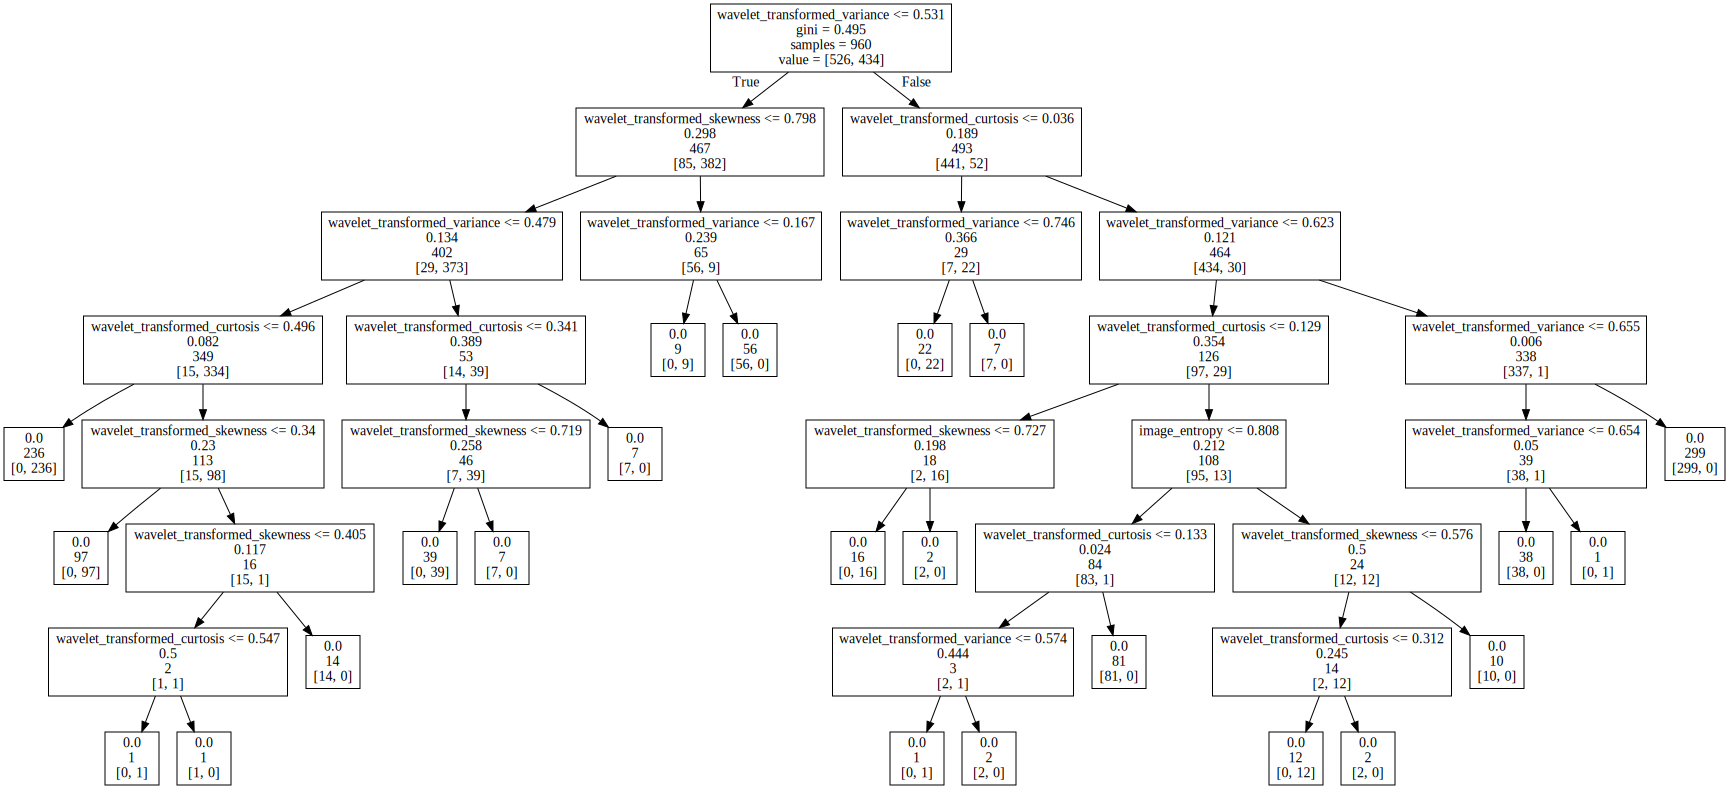

In [24]:
dotData = tree.export_graphviz(model, out_file=None, feature_names=['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy'], label='root') 
graph = graphviz.Source(dotData)
graph

Decision tree with parameters of Upadhyaya et al[8]:
- max depth: 3;
- minimum number of samples required to split: 100;
- minimum number of samples required to be at a leaf node: 50.  

In [46]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_split = 100, min_samples_leaf = 50)
model.fit(uciDataTrainNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']], uciDataTrainNorm01['counterfeit'])
testPred = model.predict(uciDataTestNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']])
print("Maximum depth: ", model.get_depth())
print("Number of leaves: ", model.get_n_leaves())
print("Tree parameters: ", model.get_params())

Maximum depth:  3
Number of leaves:  6
Tree parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 50, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [47]:
tn, fp, fn, tp = confusion_matrix(uciDataTestGT, testPred).ravel()
print("UCI Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(uciDataTestGT, testPred)
recall = recall_score(uciDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(uciDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(uciDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

UCI Dataset:
	#True Negative: 129
	#False Positive: 107
	#False Negative: 96
	#True Positive: 80
	Precision: 0.428
	Recall: 0.455
	F1 score: 0.441
	Accuracy: 0.507


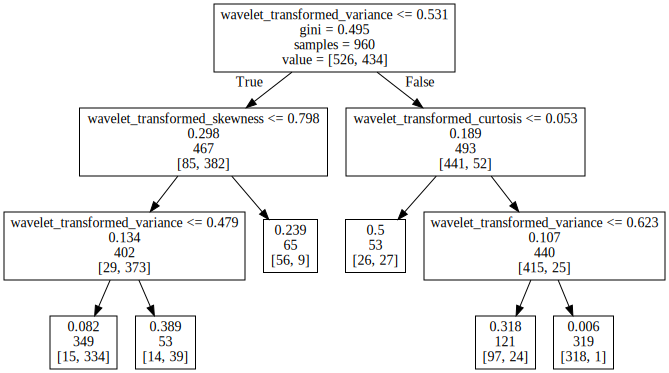

In [28]:
dotData = tree.export_graphviz(model, out_file=None, feature_names=['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy'], label='root') 
graph = graphviz.Source(dotData)
graph

##### 4.2.4 - Random Forest

In [48]:
model = RandomForestClassifier(max_depth=3, n_estimators=100)
model.fit(uciDataTrainNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']], uciDataTrainNorm01['counterfeit'])
testPred = model.predict(uciDataTestNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']])

In [49]:
tn, fp, fn, tp = confusion_matrix(uciDataTestGT, testPred).ravel()
print("UCI Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(uciDataTestGT, testPred)
recall = recall_score(uciDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(uciDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(uciDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

UCI Dataset:
	#True Negative: 122
	#False Positive: 114
	#False Negative: 103
	#True Positive: 73
	Precision: 0.390
	Recall: 0.415
	F1 score: 0.402
	Accuracy: 0.473


##### 4.2.5 - SVM

In [50]:
model = SVC(kernel='linear',C=100)
model.fit(uciDataTrainNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']], uciDataTrainNorm01['counterfeit'])
testPred = model.predict(uciDataTestNorm01[['wavelet_transformed_variance','wavelet_transformed_skewness', 'wavelet_transformed_curtosis', 'image_entropy']])

In [51]:
tn, fp, fn, tp = confusion_matrix(uciDataTestGT, testPred).ravel()
print("UCI Dataset:")
print("\t#True Negative:", tn)
print("\t#False Positive:", fp)
print("\t#False Negative:", fn)
print("\t#True Positive:", tp)
precision = precision_score(uciDataTestGT, testPred)
recall = recall_score(uciDataTestGT, testPred)
print("\tPrecision: {:0.3f}\n\tRecall: {:0.3f}".format(precision,recall))
f1 = f1_score(uciDataTestGT, testPred)
print("\tF1 score: {:0.3f}".format(f1))
accuracy = accuracy_score(uciDataTestGT, testPred)
print("\tAccuracy: {:0.3f}".format(accuracy))

UCI Dataset:
	#True Negative: 118
	#False Positive: 118
	#False Negative: 103
	#True Positive: 73
	Precision: 0.382
	Recall: 0.415
	F1 score: 0.398
	Accuracy: 0.464


##### 4.2.6 - Results

All results are expressed in percentage. The 'X' points out that the technique is not be done.

|Kumar et al[7]|Naive Bayes|Logistic Regression|Decision Trees|Decision Trees Params|Random Forest|SVM|
|--------------|-----------|-------------------|--------------|---------------------|-------------|---|
|accuracy      |    85.9   |         X         |     99.5     |          X          |      X      | X |
|recall        |    84.3   |         X         |     100      |          X          |      X      | X |

|Upadhyaya et al[7]|Naive Bayes|Logistic Regression|Decision Trees|Decision Trees Params|Random Forest|SVM|
|------------------|-----------|-------------------|--------------|---------------------|-------------|---|
|accuracy          |    X      |         X         |    X         |          91.0       |      X      | X |
|recall            |    X      |         X         |     X        |          95.1       |      X      | X |

|seed=1357|Naive Bayes|Logistic Regression|Decision Trees|Decision Trees Params|Random Forest|SVM  |
|---------|-----------|-------------------|--------------|---------------------|-------------|-----|
|accuracy |    86.7   |         100       |      97.9    |          84.5       |    94.7     | 100 |
|recall   |    83.4   |         99.3      |      98.1    |          87.9       |     95.4    |99.3 |

|seed=1467|Naive Bayes|Logistic Regression|Decision Trees|Decision Trees Params|Random Forest|SVM |
|---------|-----------|-------------------|--------------|---------------------|-------------|----|
|accuracy |    80.4   |         99.0      |      99.5    |          86.8       |    94.7     |98.9|
|recall   |    84.0   |         93.0      |      99.0    |          88.6       |    95.9     |99.3|

|seed=2865|Naive Bayes|Logistic Regression|Decision Trees|Decision Trees Params|Random Forest|SVM  |
|---------|-----------|-------------------|--------------|---------------------|-------------|-----|
|accuracy |    79.5   |         100      |      96.0    |          85.2       |    94.3     | 99.4|
|recall   |    83.0   |         99.0      |      98.1    |          89.6       |     96.1    |99.8|

The different seed conditions the algorithms (Naive Bayes, Decision Trees and Decision Trees Parametrized) used in two papers whose results are better than those of this work but they report only few parameters of this techniques.  
Random Forest, Logistic Regression and SVM are the stronger algorithms but the comparison is not possible because there is no their use until in the state of art for this task. Among these Logistic Regression achieved best results.

### Conclusions

The classification achieved great results in both datasets:
- the *Swiss Dataset* is very didactic and so it is classified by all tested classifiers easily;
- the *UCI Dataset* produces different results according to machine learning algorithms and seed for random split of dataset; the best and stronger results are get by Logistic Regression and SVM and both techniques are not used by two compared works[7], [8].  

In future it can be done light-weight system (e.g. for mobile devices) that extracts the same features from image of banknote and tries to classify it exploit Logistic Regression or SVM model.

### References

[1] Lohweg, V. (2012). 
Banknote Authentication Data Set. University of Applied Sciences, Ostwestfalen-Lippe. https://archive.ics.uci.edu/ml/datasets/banknote+authentication.  

[2] Flury, B. and Riedwyl, H. (1988). Multivariate Statistics: A practical approach. London: Chapman and Hall. https://www.rdocumentation.org/packages/uskewFactors/versions/2.0/topics/Swiss%20Banknote%20Data.  

[3] Pandas DataFrame plot density. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html.  

[4] Wikipedia, Skewness. https://en.wikipedia.org/wiki/Skewness.  

[5] Wikipedia, Kurtosis. https://en.wikipedia.org/wiki/Kurtosis.  

[6] In Depth: Principal Component Analysis. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html.

[7] Kumar, C. and Dudyala A.K. (2015). Bank Note Authentication Using Decision Tree rules and Machine Learning Techniques.  

[8] Upadhyaya, A. and Shokeen, V and Srivastava, G. (2018). Decision Tree model for classification of fake and genuine banknotes using SPSS.